# Read dicom files


## set up environment


In [2]:
!pip install DicomRTTool


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install SimpleITK


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [4]:
from DicomRTTool.ReaderWriter import DicomReaderWriter, ROIAssociationClass
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np

## initialize DicomRTTool

In [11]:
def display_slices(image, mask, skip=1):
    """
    Displays a series of slices in z-direction that contains the segmented regions of interest.
    Ensures all contours are displayed in consistent and different colors.
        Parameters:
            image (array-like): Numpy array of image.
            mask (array-like): Numpy array of mask.
            skip (int): Only print every nth slice, i.e. if 3 only print every 3rd slice, default 1.
        Returns:
            None (series of in-line plots).
    """

    slice_locations = np.unique(np.where(mask != 0)[0]) # get indexes for where there is a contour present 
    slice_start = slice_locations[0] # first slice of contour 
    slice_end = slice_locations[len(slice_locations)-1] # last slice of contour
    
    counter = 1
    
    for img_arr, contour_arr in zip(image[slice_start:slice_end+1], mask[slice_start:slice_end+1]): # plot the slices with contours overlayed ontop
        if counter % skip == 0: # if current slice is divisible by desired skip amount 
            masked_contour_arr = np.ma.masked_where(contour_arr == 0, contour_arr)
            plt.imshow(img_arr, cmap='gray', interpolation='none')
            plt.imshow(masked_contour_arr, cmap='cool', interpolation='none', alpha=0.5, vmin = 1, vmax = np.amax(mask)) # vmax is set as total number of contours so same colors can be displayed for each slice
            plt.show()
        counter += 1

In [15]:

Dicom_path = r'/Users/zyzou/Desktop/data/BATCH 1'
Dicom_reader = DicomReaderWriter(description='Examples', arg_max=True)
Dicom_reader.walk_through_folders(Dicom_path) # This will parse through all DICOM present in the folder and subfolders
all_rois = Dicom_reader.return_rois(print_rois=True) # Return a list of all rois present

# Contour_names = ['tumor'] # Define what rois you want
# associations = [ROIAssociationClass('tumor', ['tumor_mr', 'tumor_ct'])] # Any list of roi associations
# Dicom_reader.set_contour_names_and_assocations(contour_names=Contour_names, associations=associations)





Loading through DICOM files:   1%|          | 2/204 [00:00<00:10, 18.43it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0049/2017-12__Studies/NU.0049_NU.0049_RTPLAN_2017-12-24_145132_SBRT.Lung.planning_NU.0049_n1__00000Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0040/2019-05__Studies/NU.0040_NU.0040_RTPLAN_2019-05-22_143029_SBRT.LUL.Planning_NU.0040_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0040/2019-05__Studies/NU.0040_NU.0040_CT_2019-05-22_143029_SBRT.LUL.Planning_NU.0040_n155__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0049/2017-12__Studies/NU.0049_NU.0049_RTDOSE_2017-12-24_145132_SBRT.Lung.planning_NU.0049_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0049/2017-12__Studies/NU.0049_NU.0049_RTst_2017-12-24_145132_SBRT.Lung.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0049/2017-12__Studies/NU.0049_NU.0049_CT_2017-12-24_145132_SBRT.Lung.planning_NU.0049_n133__00000

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0040/2019-05__Studies/NU.0040_NU.0040_RTDOSE_2019-05-22_143029_


Loading through DICOM files:   2%|▏         | 5/204 [00:00<00:08, 24.20it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0041/2013-10__Studies/NU.0041_NU.0041_CT_2013-10-29_091902_SBRT.LLL.Plan_NU.0041_n213__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0041/2013-10__Studies/NU.0041_NU.0041_RTPLAN_2013-10-29_091902_SBRT.LLL.Plan_NU.0041_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052985.933.9276.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0041/2013-10__Studies/NU.0041_NU.0041_RTst_2013-10-29_091902_SBRT.LLL.Plan_AY_n1__00000



Loading through DICOM files:   4%|▍         | 8/204 [00:00<00:12, 15.70it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0046/2010-04__Studies/NU.0046_NU.0046_RTDOSE_2010-04-17_111158_SBRT.Lung.Planning_NU.0046_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0046/2010-04__Studies/NU.0046_NU.0046_RTst_2010-04-17_111158_SBRT.Lung.Planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0046/2010-04__Studies/NU.0046_NU.0046_RTPLAN_2010-04-17_111158_SBRT.Lung.Planning_NU.0046_n1__00000



Loading through DICOM files:   5%|▌         | 11/204 [00:00<00:15, 12.39it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0046/2010-04__Studies/NU.0046_NU.0046_RTPLAN_2010-04-17_111158_SBRT.Lung.Planning_NU.0046_n1__00000/2.16.840.1.114362.1.11940992.22933840372.574577423.363.3121.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0046/2010-04__Studies/NU.0046_NU.0046_CT_2010-04-17_111158_SBRT.Lung.Planning_NU.0046_n194__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0048/2019-01__Studies/NU.0048_NU.0048_RTst_2019-01-06_133940_sbrt.lung.iso.Planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0048/2019-01__Studies/NU.0048_NU.0048_CT_2019-01-06_133940_sbrt.lung.iso.Planning_NU.0048_n116__00000



Loading through DICOM files:   6%|▋         | 13/204 [00:01<00:26,  7.18it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0048/2019-01__Studies/NU.0048_NU.0048_RTPLAN_2019-01-06_133940_MinIP.sbrt.lung.iso.Planning_NU.0048_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0048/2019-01__Studies/NU.0048_NU.0048_RTPLAN_2019-01-06_133940_MinIP.sbrt.lung.iso.Planning_NU.0048_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569461427.807.6079.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0048/2019-01__Studies/NU.0048_NU.0048_RTDOSE_2019-01-06_133940_MinIP.sbrt.lung.iso.Planning_NU.0048_n1__00000



Loading through DICOM files:   7%|▋         | 15/204 [00:01<00:25,  7.43it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0023/2018-08__Studies/NU.0023_NU.0023_RTst_2018-08-03_144220_sbrt.lung.planning_AY_n1__00000



Loading through DICOM files:   9%|▉         | 19/204 [00:02<00:38,  4.83it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0023/2018-08__Studies/NU.0023_NU.0023_RTDOSE_2018-08-03_144220_MinIP.sbrt.lung.planning_NU.0023_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0023/2018-08__Studies/NU.0023_NU.0023_CT_2018-08-03_144220_sbrt.lung.planning_NU.0023_n183__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0023/2018-08__Studies/NU.0023_NU.0023_RTPLAN_2018-08-03_144220_MinIP.sbrt.lung.planning_NU.0023_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0023/2018-08__Studies/NU.0023_NU.0023_RTPLAN_2018-08-03_144220_MinIP.sbrt.lung.planning_NU.0023_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048679.915.6347.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0024/2018-08__Studies/NU.0024_NU.0024_RTDOSE_2018-08-09_163459_sbrt.lung.planning.scan_NU.0024_n1__00000



Loading through DICOM files:  10%|█         | 21/204 [00:03<00:33,  5.45it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0024/2018-08__Studies/NU.0024_NU.0024_RTst_2018-08-09_163459_sbrt.lung.planning.scan_AY_n1__00000



Loading through DICOM files:  11%|█         | 22/204 [00:03<00:36,  5.00it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0024/2018-08__Studies/NU.0024_NU.0024_CT_2018-08-09_163459_sbrt.lung.planning.scan_NU.0024_n170__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0024/2018-08__Studies/NU.0024_NU.0024_RTPLAN_2018-08-09_163459_sbrt.lung.planning.scan_NU.0024_n1__00000



Loading through DICOM files:  13%|█▎        | 27/204 [00:03<00:20,  8.81it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0015/2018-08__Studies/NU.0015_NU.0015_CT_2018-08-25_111034_SBRT.Chest.planning_NU.0015_n170__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0024/2018-08__Studies/NU.0024_NU.0024_RTPLAN_2018-08-09_163459_sbrt.lung.planning.scan_NU.0024_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569053792.541.6429.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0015/2018-08__Studies/NU.0015_NU.0015_RTDOSE_2018-08-25_111034_SBRT.Chest.planning_NU.0015_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0015/2018-08__Studies/NU.0015_NU.0015_RTst_2018-08-25_111034_SBRT.Chest.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0015/2018-08__Studies/NU.0015_NU.0015_RTPLAN_2018-08-25_111034_SBRT.Chest.planning_NU.0015_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0015/2018-08__Studies/NU.0015_NU.0015_RTPLAN_2018-08-25_111034_SBRT.Chest.planning_NU.0015_n1__00000/2.16.840.1.114362.1


Loading through DICOM files:  14%|█▍        | 29/204 [00:03<00:18,  9.71it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0012A/2019-04__Studies/NU.0012C_NU.0012C_RTDOSE_2019-04-11_095832_MinIP.SBRT.Lung.Planning.Scan_NU.0012C_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0012A/2019-04__Studies/NU.0012C_NU.0012C_RTst_2019-04-11_095832_SBRT.Lung.Planning.Scan_AY.0012A_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0012A/2019-04__Studies/NU.0012C_NU.0012C_CT_2019-04-11_095832_SBRT.Lung.Planning.Scan_NU.0012C_n180__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0012A/2019-04__Studies/NU.0012C_NU.0012C_RTPLAN_2019-04-11_095832_MinIP.SBRT.Lung.Planning.Scan_NU.0012C_n1__00000



Loading through DICOM files:  16%|█▌        | 33/204 [00:04<00:16, 10.58it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0012A/2019-04__Studies/NU.0012C_NU.0012C_RTPLAN_2019-04-11_095832_MinIP.SBRT.Lung.Planning.Scan_NU.0012C_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569056651.949.553.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0037/2012-09__Studies/NU.0037_NU.0037_RTDOSE_2012-09-12_091234_SBRT.planning.bellows_NU.0037_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0037/2012-09__Studies/NU.0037_NU.0037_RTPLAN_2012-09-12_091234_SBRT.planning.bellows_NU.0037_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0037/2012-09__Studies/NU.0037_NU.0037_RTst_2012-09-12_091234_SBRT.planning.bellows_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0037/2012-09__Studies/NU.0037_NU.0037_RTPLAN_2012-09-12_091234_SBRT.planning.bellows_NU.0037_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048464.189.8906.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0037/2012-09__Studies/NU.0037_NU.0037


Loading through DICOM files:  17%|█▋        | 35/204 [00:04<00:23,  7.27it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0030/2018-10__Studies/NU.0030_NU.0030_RTDOSE_2018-10-02_150021_MinIP.SBRT.Chest.Planning.Scan_NU.0030_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0030/2018-10__Studies/NU.0030_NU.0030_RTst_2018-10-02_150021_SBRT.Chest.Planning.Scan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0030/2018-10__Studies/NU.0030_NU.0030_CT_2018-10-02_150021_SBRT.Chest.Planning.Scan_NU.0030_n142__00000



Loading through DICOM files:  19%|█▉        | 39/204 [00:05<00:22,  7.42it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0030/2018-10__Studies/NU.0030_NU.0030_RTPLAN_2018-10-02_150021_MinIP.SBRT.Chest.Planning.Scan_NU.0030_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0030/2018-10__Studies/NU.0030_NU.0030_RTPLAN_2018-10-02_150021_MinIP.SBRT.Chest.Planning.Scan_NU.0030_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569057948.717.549.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0039/2010-12__Studies/NU.0039_NU.0039_CT_2010-12-12_105749_SBRT.Lung.planning.w.IV.and.bellows_NU.0039_n152__00000



Loading through DICOM files:  20%|█▉        | 40/204 [00:05<00:27,  5.92it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0039/2010-12__Studies/NU.0039_NU.0039_RTPLAN_2010-12-12_105749_._NU.0039_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0039/2010-12__Studies/NU.0039_NU.0039_RTPLAN_2010-12-12_105749_._NU.0039_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051369.808.5103.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0039/2010-12__Studies/NU.0039_NU.0039_RTst_2010-12-12_105749_SBRT.Lung.planning.w.IV.and.bellows_AY_n1__00000



Loading through DICOM files:  22%|██▏       | 45/204 [00:06<00:29,  5.47it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0039/2010-12__Studies/NU.0039_NU.0039_RTDOSE_2010-12-12_105749_._NU.0039_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0006/2018-07__Studies/NU.0006_NU.0006_RTDOSE_2018-07-17_141739_MInIP.SBRT.lung.Bellows.Scan_NU.0006_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0006/2018-07__Studies/NU.0006_NU.0006_RTPLAN_2018-07-17_141739_MInIP.SBRT.lung.Bellows.Scan_NU.0006_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0006/2018-07__Studies/NU.0006_NU.0006_RTst_2018-07-17_141739_SBRT.lung.Planning.Scan_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0006/2018-07__Studies/NU.0006_NU.0006_RTPLAN_2018-07-17_141739_MInIP.SBRT.lung.Bellows.Scan_NU.0006_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569054198.579.7392.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0006/2018-07__Studies/NU.0006_NU.0006_CT_2018-07-17_141739_SBRT.lung.Planning.Scan_NU.0006_n143__00000



Loading through DICOM files:  23%|██▎       | 47/204 [00:07<00:32,  4.80it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0001/2018-10__Studies/NU.0001_NU.0001_RTst_2018-10-08_144305_SBRT.Planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0001/2018-10__Studies/NU.0001_NU.0001_RTPLAN_2018-10-08_144305_SBRT.Planning_NU.0001_n1__00000



Loading through DICOM files:  25%|██▍       | 50/204 [00:07<00:28,  5.49it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0001/2018-10__Studies/NU.0001_NU.0001_RTPLAN_2018-10-08_144305_SBRT.Planning_NU.0001_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569057282.346.7761.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0001/2018-10__Studies/NU.0001_NU.0001_RTDOSE_2018-10-08_144305_SBRT.Planning_NU.0001_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0001/2018-10__Studies/NU.0001_NU.0001_CT_2018-10-08_144305_SBRT.Planning_NU.0001_n172__00000



Loading through DICOM files:  25%|██▌       | 51/204 [00:08<00:32,  4.69it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0055/2016-04__Studies/NU.0055_NU.0055_RTPLAN_2016-04-18_135434_SBRT.lung.planning_NU.0055_n1__00000



Loading through DICOM files:  25%|██▌       | 52/204 [00:08<00:33,  4.58it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0055/2016-04__Studies/NU.0055_NU.0055_RTPLAN_2016-04-18_135434_SBRT.lung.planning_NU.0055_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051027.554.635.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0055/2016-04__Studies/NU.0055_NU.0055_RTst_2016-04-18_135434_SBRT.lung.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0055/2016-04__Studies/NU.0055_NU.0055_CT_2016-04-18_135434_SBRT.lung.planning_NU.0055_n164__00000



Loading through DICOM files:  28%|██▊       | 57/204 [00:08<00:20,  7.25it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0055/2016-04__Studies/NU.0055_NU.0055_RTDOSE_2016-04-18_135434_SBRT.lung.planning_NU.0055_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0052/2013-02__Studies/NU.0052_NU.0052_RTDOSE_2013-02-04_085835_SBRT.Lung.Plan_NU.0052_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0052/2013-02__Studies/NU.0052_NU.0052_RTst_2013-02-04_085835_SBRT.Lung.Plan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0052/2013-02__Studies/NU.0052_NU.0052_CT_2013-02-04_085835_SBRT.Lung.Plan_NU.0052_n157__00000



Loading through DICOM files:  28%|██▊       | 58/204 [00:09<00:24,  6.03it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0052/2013-02__Studies/NU.0052_NU.0052_RTPLAN_2013-02-04_085835_SBRT.Lung.Plan_NU.0052_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0063/2018-12__Studies/NU.0063_NU.0063_CT_2018-12-01_145941_SBRT.Chest.planning_NU.0063_n164__00000



Loading through DICOM files:  29%|██▉       | 60/204 [00:09<00:21,  6.83it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0052/2013-02__Studies/NU.0052_NU.0052_RTPLAN_2013-02-04_085835_SBRT.Lung.Plan_NU.0052_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055848.269.64.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0063/2018-12__Studies/NU.0063_NU.0063_RTPLAN_2018-12-01_145941_MinIP.SBRT.Chest.planning_NU.0063_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0063/2018-12__Studies/NU.0063_NU.0063_RTst_2018-12-01_145941_SBRT.Chest.planning_AY_n1__00000



Loading through DICOM files:  31%|███▏      | 64/204 [00:09<00:18,  7.64it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0063/2018-12__Studies/NU.0063_NU.0063_RTPLAN_2018-12-01_145941_MinIP.SBRT.Chest.planning_NU.0063_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052301.996.1566.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0063/2018-12__Studies/NU.0063_NU.0063_RTDOSE_2018-12-01_145941_MinIP.SBRT.Chest.planning_NU.0063_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0038/2012-03__Studies/NU.0038_NU.0038_RTPLAN_2012-03-05_113831_SBRT.Planning.Scan_NU.0038_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0038/2012-03__Studies/NU.0038_NU.0038_RTPLAN_2012-03-05_113831_SBRT.Planning.Scan_NU.0038_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048378.424.3253.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0038/2012-03__Studies/NU.0038_NU.0038_RTDOSE_2012-03-05_113831_SBRT.Planning.Scan_NU.0038_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0038/2012-03__Studies/NU.0038_NU.0038_CT_2


Loading through DICOM files:  33%|███▎      | 67/204 [00:10<00:15,  8.62it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0007/2018-08__Studies/NU.0007_NU.0007_CT_2018-08-27_133110_SBRT.Plan.and.Bellows_NU.0007_n165__00000



Loading through DICOM files:  33%|███▎      | 68/204 [00:10<00:20,  6.71it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0007/2018-08__Studies/NU.0007_NU.0007_RTDOSE_2018-08-27_133110_SBRT.Plan.and.Bellows_NU.0007_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0007/2018-08__Studies/NU.0007_NU.0007_RTst_2018-08-27_133110_SBRT.Plan.and.Bellows_AY_n1__00000



Loading through DICOM files:  34%|███▍      | 70/204 [00:10<00:19,  6.97it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0007/2018-08__Studies/NU.0007_NU.0007_RTPLAN_2018-08-27_133110_SBRT.Plan.and.Bellows_NU.0007_n1__00000



Loading through DICOM files:  36%|███▌      | 73/204 [00:11<00:17,  7.43it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0007/2018-08__Studies/NU.0007_NU.0007_RTPLAN_2018-08-27_133110_SBRT.Plan.and.Bellows_NU.0007_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569056098.532.3477.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0036/2010-10__Studies/NU.0036_NU.0036_RTDOSE_2010-10-20_100815_SBRT.Right.Lung.Plan_NU.0036_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0036/2010-10__Studies/NU.0036_NU.0036_RTPLAN_2010-10-20_100815_SBRT.Right.Lung.Plan_NU.0036_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0036/2010-10__Studies/NU.0036_NU.0036_RTPLAN_2010-10-20_100815_SBRT.Right.Lung.Plan_NU.0036_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048418.186.6931.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0036/2010-10__Studies/NU.0036_NU.0036_RTst_2010-10-20_100815_SBRT.Right.Lung.Plan_AY_n1__00000



Loading through DICOM files:  36%|███▋      | 74/204 [00:11<00:31,  4.15it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0036/2010-10__Studies/NU.0036_NU.0036_CT_2010-10-20_100815_SBRT.Right.Lung.Plan_NU.0036_n165__00000



Loading through DICOM files:  38%|███▊      | 77/204 [00:12<00:21,  5.79it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0062/2012-09__Studies/NU.0062_NU.0062_RTPLAN_2012-09-23_092750_SBRT.Lung.Plan_NU.0062_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0062/2012-09__Studies/NU.0062_NU.0062_CT_2012-09-23_092750_SBRT.Lung.Plan_NU.0062_n175__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0062/2012-09__Studies/NU.0062_NU.0062_RTPLAN_2012-09-23_092750_SBRT.Lung.Plan_NU.0062_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052816.114.2423.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0062/2012-09__Studies/NU.0062_NU.0062_RTst_2012-09-23_092750_SBRT.Lung.Plan_AY_n1__00000



Loading through DICOM files:  38%|███▊      | 78/204 [00:12<00:22,  5.50it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0062/2012-09__Studies/NU.0062_NU.0062_RTDOSE_2012-09-23_092750_SBRT.Lung.Plan_NU.0062_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0065/2016-05__Studies/NU.0065_NU.0065_RTst_2016-05-10_133801_sbrt.lung_AY_n1__00000



Loading through DICOM files:  40%|███▉      | 81/204 [00:12<00:19,  6.24it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0065/2016-05__Studies/NU.0065_NU.0065_CT_2016-05-10_133801_sbrt.lung_NU.0065_n149__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0065/2016-05__Studies/NU.0065_NU.0065_RTDOSE_2016-05-10_133801_sbrt.lung_NU.0065_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0065/2016-05__Studies/NU.0065_NU.0065_RTPLAN_2016-05-10_133801_sbrt.lung_NU.0065_n1__00000



Loading through DICOM files:  42%|████▏     | 86/204 [00:12<00:09, 12.21it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0004R/2019-03__Studies/NU.0004_NU.0004_RTDOSE_2019-03-02_105611_SBRT.Planning.Scan_NU.0004_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0004R/2019-03__Studies/NU.0004_NU.0004_RTst_2019-03-02_105611_SBRT.Planning.Scan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0004R/2019-03__Studies/NU.0004_NU.0004_RTPLAN_2019-03-02_105611_SBRT.Planning.Scan_NU.0004_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0065/2016-05__Studies/NU.0065_NU.0065_RTPLAN_2016-05-10_133801_sbrt.lung_NU.0065_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584243432.204.1804.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0004R/2019-03__Studies/NU.0004_NU.0004_CT_2019-03-02_105611_SBRT.Planning.Scan_NU.0004_n174__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0053/2016-03__Studies/NU.0053_NU.0053_RTst_2016-03-14_083416_SBRT.Lung.Planning_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BA


Loading through DICOM files:  44%|████▎     | 89/204 [00:13<00:07, 15.24it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0053/2016-03__Studies/NU.0053_NU.0053_RTPLAN_2016-03-14_083416_SBRT.Lung.Planning_NU.0053_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0053/2016-03__Studies/NU.0053_NU.0053_CT_2016-03-14_083416_SBRT.Lung.Planning_NU.0053_n168__00000



Loading through DICOM files:  46%|████▌     | 93/204 [00:13<00:10, 10.48it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0053/2016-03__Studies/NU.0053_NU.0053_RTPLAN_2016-03-14_083416_SBRT.Lung.Planning_NU.0053_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048380.980.3450.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0054/2016-02__Studies/NU.0054_NU.0054_RTPLAN_2016-02-25_161010_L.Lung.SBRT.plan_._n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0054/2016-02__Studies/NU.0054_NU.0054_CT_2016-02-25_161010_L.Lung.SBRT.plan_._n171__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0054/2016-02__Studies/NU.0054_NU.0054_RTPLAN_2016-02-25_161010_L.Lung.SBRT.plan_._n1__00000/2.16.840.1.114362.1.12046989.25391989775.615975847.169.1214.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0054/2016-02__Studies/NU.0054_NU.0054_RTst_2016-02-25_161010_L.Lung.SBRT.plan_AY_n1__00000



Loading through DICOM files:  47%|████▋     | 95/204 [00:13<00:11,  9.75it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0054/2016-02__Studies/NU.0054_NU.0054_RTDOSE_2016-02-25_161010_L.Lung.SBRT.plan_._n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0010/2019-02__Studies/NU.0010_NU.0010_RTDOSE_2019-02-01_150559_SBRT.RLL.Planning.scan_NU.0010_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0010/2019-02__Studies/NU.0010_NU.0010_CT_2019-02-01_150559_SBRT.RLL.Planning.scan_NU.0010_n196__00000



Loading through DICOM files:  48%|████▊     | 97/204 [00:14<00:15,  6.93it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0010/2019-02__Studies/NU.0010_NU.0010_RTst_2019-02-01_150559_SBRT.RLL.Planning.scan_AY_n1__00000



Loading through DICOM files:  48%|████▊     | 98/204 [00:14<00:22,  4.74it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0010/2019-02__Studies/NU.0010_NU.0010_RTPLAN_2019-02-01_150559_SBRT.RLL.Planning.scan_NU.0010_n1__00000



Loading through DICOM files:  49%|████▉     | 100/204 [00:15<00:22,  4.66it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0010/2019-02__Studies/NU.0010_NU.0010_RTPLAN_2019-02-01_150559_SBRT.RLL.Planning.scan_NU.0010_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569054352.626.1661.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/ANON_0021/2018-07__Studies/ANON.0021_ANON.0021_RTPLAN_2018-07-09_160712_MinIP.SBRT.lung.planning_._n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/ANON_0021/2018-07__Studies/ANON.0021_ANON.0021_RTPLAN_2018-07-09_160712_MinIP.SBRT.lung.planning_._n1__00000/2.16.840.1.114362.1.12046989.25219549400.615947618.725.9510.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/ANON_0021/2018-07__Studies/ANON.0021_ANON.0021_CT_2018-07-09_160712_SBRT.lung.planning_._n113__00000



Loading through DICOM files:  50%|█████     | 103/204 [00:15<00:13,  7.67it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/ANON_0021/2018-07__Studies/ANON.0021_ANON.0021_RTst_2018-07-09_160712_SBRT.lung.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/ANON_0021/2018-07__Studies/ANON.0021_ANON.0021_RTDOSE_2018-07-09_160712_MinIP.SBRT.lung.planning_._n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0028/2018-08__Studies/NU.0028_NU.0028_RTst_2018-08-07_111010_SBRT.Lung.Planning_AY_n1__00000



Loading through DICOM files:  51%|█████▏    | 105/204 [00:15<00:14,  7.05it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0028/2018-08__Studies/NU.0028_NU.0028_CT_2018-08-07_111010_SBRT.Lung.Planning_NU.0028_n177__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0028/2018-08__Studies/NU.0028_NU.0028_RTDOSE_2018-08-07_111010_MInIP.SBRT.Lung.Planning_NU.0028_n1__00000



Loading through DICOM files:  52%|█████▏    | 107/204 [00:15<00:11,  8.81it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0028/2018-08__Studies/NU.0028_NU.0028_RTPLAN_2018-08-07_111010_MInIP.SBRT.Lung.Planning_NU.0028_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0026/2018-07__Studies/NU.0026_NU.0026_RTPLAN_2018-07-13_153554_MInIP.SBRT.chest.plan.and.bellows_NU.0026_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0028/2018-08__Studies/NU.0028_NU.0028_RTPLAN_2018-08-07_111010_MInIP.SBRT.Lung.Planning_NU.0028_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569053332.327.1295.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0026/2018-07__Studies/NU.0026_NU.0026_RTst_2018-07-13_153554_SBRT.chest.plan.and.bellows_AY_n1__00000



Loading through DICOM files:  53%|█████▎    | 109/204 [00:16<00:10,  9.42it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0026/2018-07__Studies/NU.0026_NU.0026_RTPLAN_2018-07-13_153554_MInIP.SBRT.chest.plan.and.bellows_NU.0026_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569049523.577.8684.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0026/2018-07__Studies/NU.0026_NU.0026_RTDOSE_2018-07-13_153554_MInIP.SBRT.chest.plan.and.bellows_NU.0026_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0026/2018-07__Studies/NU.0026_NU.0026_CT_2018-07-13_153554_SBRT.chest.plan.and.bellows_NU.0026_n161__00000



Loading through DICOM files:  54%|█████▍    | 111/204 [00:16<00:11,  8.11it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0019/2018-07__Studies/NU.0019_NU.0019_RTPLAN_2018-07-11_162227_sbrt.lung.planning_NU.0019_n1__00000



Loading through DICOM files:  56%|█████▌    | 114/204 [00:16<00:11,  7.87it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0019/2018-07__Studies/NU.0019_NU.0019_RTPLAN_2018-07-11_162227_sbrt.lung.planning_NU.0019_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584609494.501.403.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0019/2018-07__Studies/NU.0019_NU.0019_CT_2018-07-11_162227_sbrt.lung.planning_NU.0019_n158__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0019/2018-07__Studies/NU.0019_NU.0019_RTDOSE_2018-07-11_162227_sbrt.lung.planning_NU.0019_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0019/2018-07__Studies/NU.0019_NU.0019_RTst_2018-07-11_162227_sbrt.lung.planning_AY_n1__00000



Loading through DICOM files:  57%|█████▋    | 116/204 [00:16<00:09,  9.50it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0043/2018-08__Studies/NU.0043_NU.0043_RTDOSE_2018-08-20_085659_SBRT.Planning.Scan_NU.0043_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0043/2018-08__Studies/NU.0043_NU.0043_RTst_2018-08-20_085659_SBRT.Planning.Scan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0043/2018-08__Studies/NU.0043_NU.0043_CT_2018-08-20_085659_SBRT.Planning.Scan_NU.0043_n160__00000



Loading through DICOM files:  58%|█████▊    | 118/204 [00:17<00:18,  4.69it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0043/2018-08__Studies/NU.0043_NU.0043_RTPLAN_2018-08-20_085659_SBRT.Planning.Scan_NU.0043_n1__00000



Loading through DICOM files:  58%|█████▊    | 119/204 [00:18<00:18,  4.49it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0043/2018-08__Studies/NU.0043_NU.0043_RTPLAN_2018-08-20_085659_SBRT.Planning.Scan_NU.0043_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048660.834.5222.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0044/2016-08__Studies/NU.0044_NU.0044_RTDOSE_2016-08-12_091943_SBRT.RLL.PLANNING_NU.0044_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0044/2016-08__Studies/NU.0044_NU.0044_CT_2016-08-12_091943_SBRT.RLL.PLANNING_NU.0044_n177__00000



Loading through DICOM files:  60%|██████    | 123/204 [00:18<00:13,  5.91it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0044/2016-08__Studies/NU.0044_NU.0044_RTPLAN_2016-08-12_091943_SBRT.RLL.PLANNING_NU.0044_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0044/2016-08__Studies/NU.0044_NU.0044_RTst_2016-08-12_091943_SBRT.RLL.PLANNING_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0044/2016-08__Studies/NU.0044_NU.0044_RTPLAN_2016-08-12_091943_SBRT.RLL.PLANNING_NU.0044_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569056857.729.6663.dcm



Loading through DICOM files:  61%|██████▏   | 125/204 [00:18<00:11,  6.84it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0018/2018-07__Studies/NU.0018_NU.0018_CT_2018-07-11_125322_sbrt.lung.planning_._n151__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0018/2018-07__Studies/NU.0018_NU.0018_RTst_2018-07-11_125322_sbrt.lung.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0018/2018-07__Studies/NU.0018_NU.0018_RTDOSE_2018-07-11_125322_sbrt.lung.planning_._n1__00000



Loading through DICOM files:  63%|██████▎   | 128/204 [00:18<00:08,  9.04it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0018/2018-07__Studies/NU.0018_NU.0018_RTPLAN_2018-07-11_125322_sbrt.lung.planning_._n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0020/2018-07__Studies/NU.0020_NU.0020_CT_2018-07-10_145219_SBRT.planning_NU.0020_n156__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0018/2018-07__Studies/NU.0018_NU.0018_RTPLAN_2018-07-11_125322_sbrt.lung.planning_._n1__00000/2.16.840.1.114362.1.11940992.24327927514.584241430.895.839.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0020/2018-07__Studies/NU.0020_NU.0020_RTst_2018-07-10_145219_SBRT.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0020/2018-07__Studies/NU.0020_NU.0020_RTPLAN_2018-07-10_145219_SBRT.planning_NU.0020_n1__00000



Loading through DICOM files:  64%|██████▎   | 130/204 [00:19<00:10,  6.84it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0020/2018-07__Studies/NU.0020_NU.0020_RTPLAN_2018-07-10_145219_SBRT.planning_NU.0020_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584242176.1086.1008.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0020/2018-07__Studies/NU.0020_NU.0020_RTDOSE_2018-07-10_145219_SBRT.planning_NU.0020_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0011/2019-06__Studies/NU.0011_NU.0011_RTPLAN_2019-06-11_160923_MinIP.SBRT.Planning.Scan_._n1__00000



Loading through DICOM files:  66%|██████▌   | 135/204 [00:19<00:07,  9.72it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0011/2019-06__Studies/NU.0011_NU.0011_RTPLAN_2019-06-11_160923_MinIP.SBRT.Planning.Scan_._n1__00000/2.16.840.1.114362.1.11940992.24327927514.584240850.1027.478.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0011/2019-06__Studies/NU.0011_NU.0011_RTst_2019-06-11_160923_SBRT.Planning.Scan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0011/2019-06__Studies/NU.0011_NU.0011_CT_2019-06-11_160923_SBRT.Planning.Scan_._n126__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0011/2019-06__Studies/NU.0011_NU.0011_RTDOSE_2019-06-11_160923_MinIP.SBRT.Planning.Scan_._n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0045/2018-04__Studies/NU.0045_NU.0045_RTst_2018-04-03_145050_sbrt.lung.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0045/2018-04__Studies/NU.0045_NU.0045_CT_2018-04-03_145050_sbrt.lung.planning_NU.0045_n156__00000



Loading through DICOM files:  67%|██████▋   | 137/204 [00:20<00:08,  7.83it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0045/2018-04__Studies/NU.0045_NU.0045_RTDOSE_2018-04-03_145050_MinIP.sbrt.lung.planning_NU.0045_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0045/2018-04__Studies/NU.0045_NU.0045_RTPLAN_2018-04-03_145050_MinIP.sbrt.lung.planning_NU.0045_n1__00000



Loading through DICOM files:  68%|██████▊   | 139/204 [00:20<00:08,  8.01it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0045/2018-04__Studies/NU.0045_NU.0045_RTPLAN_2018-04-03_145050_MinIP.sbrt.lung.planning_NU.0045_n1__00000/2.16.840.1.114362.1.11940992.22933840372.579401083.747.3316.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0042/2010-02__Studies/NU.0042_NU.0042_RTst_2010-02-07_103323_SBRT.Lung.Planning_AY_n1__00000



Loading through DICOM files:  69%|██████▉   | 141/204 [00:21<00:18,  3.49it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0042/2010-02__Studies/NU.0042_NU.0042_CT_2010-02-07_103323_SBRT.Lung.Planning_NU.0042_n217__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0042/2010-02__Studies/NU.0042_NU.0042_RTPLAN_2010-02-07_103323_SBRT.Lung.Planning_NU.0042_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0042/2010-02__Studies/NU.0042_NU.0042_RTDOSE_2010-02-07_103323_SBRT.Lung.Planning_NU.0042_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0042/2010-02__Studies/NU.0042_NU.0042_RTPLAN_2010-02-07_103323_SBRT.Lung.Planning_NU.0042_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569060004.554.2310.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0067/2012-08__Studies/NU.0067_NU.0067_RTPLAN_2012-08-26_125240_RUL.SBRT.planning.scan.w..bellows_NU.0067_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0067/2012-08__Studies/NU.0067_NU.0067_RTDOSE_2012-08-26_125240_RUL.SBRT.planning.scan.w..bellows_NU.0067_n1__00000



Loading through DICOM files:  71%|███████   | 145/204 [00:22<00:08,  6.56it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0067/2012-08__Studies/NU.0067_NU.0067_RTst_2012-08-26_125240_RUL.SBRT.planning.scan.w..bellows_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0067/2012-08__Studies/NU.0067_NU.0067_RTPLAN_2012-08-26_125240_RUL.SBRT.planning.scan.w..bellows_NU.0067_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569053028.436.1055.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0067/2012-08__Studies/NU.0067_NU.0067_CT_2012-08-26_125240_RUL.SBRT.planning.scan.w..bellows_NU.0067_n195__00000



Loading through DICOM files:  72%|███████▏  | 147/204 [00:22<00:07,  7.16it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0033/2018-06__Studies/NU.0033_NU.0033_RTst_2018-06-21_152956_sbrt.lung.planning.w.contrast_AY_n1__00000



Loading through DICOM files:  73%|███████▎  | 149/204 [00:22<00:07,  7.15it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0033/2018-06__Studies/NU.0033_NU.0033_RTDOSE_2018-06-21_152956_sbrt.lung.planning.w.contrast_NU.0033_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0033/2018-06__Studies/NU.0033_NU.0033_CT_2018-06-21_152956_sbrt.lung.planning.w.contrast_NU.0033_n135__00000



Loading through DICOM files:  74%|███████▍  | 151/204 [00:22<00:07,  6.72it/s]


Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0033/2018-06__Studies/NU.0033_NU.0033_RTPLAN_2018-06-21_152956_sbrt.lung.planning.w.contrast_NU.0033_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0239/2017-08__Studies/NU.0239_NU.0239_CT_2017-08-01_093310_SBRT.Lung_._n215__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0239/2017-08__Studies/NU.0239_NU.0239_RTDOSE_2017-08-01_093310_SBRT.Lung_._n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0239/2017-08__Studies/NU.0239_NU.0239_RTst_2017-08-01_093310_SBRT.Lung_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0033/2018-06__Studies/NU.0033_NU.0033_RTPLAN_2018-06-21_152956_sbrt.lung.planning.w.contrast_NU.0033_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584242361.878.1154.dcm


Loading through DICOM files:  76%|███████▋  | 156/204 [00:23<00:04,  9.97it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0239/2017-08__Studies/NU.0239_NU.0239_RTPLAN_2017-08-01_093310_SBRT.Lung_._n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0239/2017-08__Studies/NU.0239_NU.0239_RTPLAN_2017-08-01_093310_SBRT.Lung_._n1__00000/2.16.840.1.114362.1.12046989.24327927514.609546435.590.354.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0034/2012-08__Studies/NU.0034_NU.0034_RTDOSE_2012-08-30_110406_SBRT.planning.+.bellows_NU.0034_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0034/2012-08__Studies/NU.0034_NU.0034_CT_2012-08-30_110406_SBRT.planning.+.bellows_NU.0034_n148__00000



Loading through DICOM files:  77%|███████▋  | 158/204 [00:23<00:05,  9.11it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0034/2012-08__Studies/NU.0034_NU.0034_RTst_2012-08-30_110406_SBRT.planning.+.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0034/2012-08__Studies/NU.0034_NU.0034_RTPLAN_2012-08-30_110406_SBRT.planning.+.bellows_NU.0034_n1__00000



Loading through DICOM files:  79%|███████▉  | 161/204 [00:23<00:03, 13.87it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0005/2018-08__Studies/NU.0005_NU.0005_RTDOSE_2018-08-29_144651_SBRT.LUL.Plan.Scan.and.Bellows_._n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0034/2012-08__Studies/NU.0034_NU.0034_RTPLAN_2012-08-30_110406_SBRT.planning.+.bellows_NU.0034_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052778.528.453.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0005/2018-08__Studies/NU.0005_NU.0005_CT_2018-08-29_144651_SBRT.LUL.Plan.Scan.and.Bellows_._n187__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0005/2018-08__Studies/NU.0005_NU.0005_RTPLAN_2018-08-29_144651_SBRT.LUL.Plan.Scan.and.Bellows_._n1__00000



Loading through DICOM files:  80%|███████▉  | 163/204 [00:23<00:03, 10.56it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0005/2018-08__Studies/NU.0005_NU.0005_RTPLAN_2018-08-29_144651_SBRT.LUL.Plan.Scan.and.Bellows_._n1__00000/2.16.840.1.114362.1.12046989.25391989775.615974270.1010.1.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0005/2018-08__Studies/NU.0005_NU.0005_RTst_2018-08-29_144651_SBRT.LUL.Plan.Scan.and.Bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0066/2017-08__Studies/NU.0066_NU.0066_RTst_2017-08-25_144014_R.Lung.SBRT.planning_AY_n1__00000



Loading through DICOM files:  82%|████████▏ | 167/204 [00:25<00:12,  2.91it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0066/2017-08__Studies/NU.0066_NU.0066_RTDOSE_2017-08-25_144014_R.Lung.SBRT.planning_NU.0066_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0066/2017-08__Studies/NU.0066_NU.0066_RTPLAN_2017-08-25_144014_R.Lung.SBRT.planning_NU.0066_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0066/2017-08__Studies/NU.0066_NU.0066_CT_2017-08-25_144014_R.Lung.SBRT.planning_NU.0066_n143__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0066/2017-08__Studies/NU.0066_NU.0066_RTPLAN_2017-08-25_144014_R.Lung.SBRT.planning_NU.0066_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584243478.990.1958.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0059/2015-12__Studies/NU.0059_NU.0059_RTst_2015-12-17_094629_LUL-Planning_AY_n1__00000



Loading through DICOM files:  82%|████████▏ | 168/204 [00:25<00:10,  3.29it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0059/2015-12__Studies/NU.0059_NU.0059_CT_2015-12-17_094629_LUL-Planning_NU.0059_n157__00000



Loading through DICOM files:  85%|████████▍ | 173/204 [00:26<00:04,  6.25it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0059/2015-12__Studies/NU.0059_NU.0059_RTPLAN_2015-12-17_094629_LUL-Planning_NU.0059_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0059/2015-12__Studies/NU.0059_NU.0059_RTDOSE_2015-12-17_094629_LUL-Planning_NU.0059_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0061/2018-05__Studies/NU.0061_NU.0061_RTDOSE_2018-05-15_103830_sbrt.lung.planning.bellows_NU.0061_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0061/2018-05__Studies/NU.0061_NU.0061_RTPLAN_2018-05-15_103830_sbrt.lung.planning.bellows_NU.0061_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0059/2015-12__Studies/NU.0059_NU.0059_RTPLAN_2015-12-17_094629_LUL-Planning_NU.0059_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584242873.368.1488.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0061/2018-05__Studies/NU.0061_NU.0061_CT_2018-05-15_103830_sbrt.lung.planning.bellows_NU.0061_n144__00000



Loading through DICOM files:  86%|████████▌ | 175/204 [00:26<00:03,  7.63it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0061/2018-05__Studies/NU.0061_NU.0061_RTPLAN_2018-05-15_103830_sbrt.lung.planning.bellows_NU.0061_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584243033.865.1644.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0061/2018-05__Studies/NU.0061_NU.0061_RTst_2018-05-15_103830_sbrt.lung.planning.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0057/2018-11__Studies/NU.0057_NU.0057_RTPLAN_2018-11-19_160816_sbrt.lung.planning_NU.0057_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0057/2018-11__Studies/NU.0057_NU.0057_RTDOSE_2018-11-19_160816_sbrt.lung.planning_NU.0057_n1__00000



Loading through DICOM files:  88%|████████▊ | 180/204 [00:26<00:02, 10.31it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0057/2018-11__Studies/NU.0057_NU.0057_RTst_2018-11-19_160816_sbrt.lung.planning_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0057/2018-11__Studies/NU.0057_NU.0057_RTPLAN_2018-11-19_160816_sbrt.lung.planning_NU.0057_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569461563.665.9001.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0057/2018-11__Studies/NU.0057_NU.0057_CT_2018-11-19_160816_sbrt.lung.planning_NU.0057_n167__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0068/2014-12__Studies/NU.0068_NU.0068_RTPLAN_2014-12-15_150552_Sbrt.planning.bellows_NU.0068_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0068/2014-12__Studies/NU.0068_NU.0068_RTPLAN_2014-12-15_150552_Sbrt.planning.bellows_NU.0068_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052830.195.2946.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0068/2014-12__Studies/NU.0068_NU.0068_CT_2014-12-15_150552_


Loading through DICOM files:  89%|████████▉ | 182/204 [00:26<00:02, 10.79it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0068/2014-12__Studies/NU.0068_NU.0068_RTDOSE_2014-12-15_150552_Sbrt.planning.bellows_NU.0068_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0068/2014-12__Studies/NU.0068_NU.0068_RTst_2014-12-15_150552_Sbrt.planning.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0004/2016-07__Studies/NU.0004_NU.0004_RTst_2016-07-03_145128_SBRT.Lung.planning_AY_n1__00000



Loading through DICOM files:  90%|█████████ | 184/204 [00:27<00:03,  5.82it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0004/2016-07__Studies/NU.0004_NU.0004_CT_2016-07-03_145128_SBRT.Lung.planning_NU.0004_n187__00000



Loading through DICOM files:  91%|█████████ | 185/204 [00:27<00:03,  4.84it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0004/2016-07__Studies/NU.0004_NU.0004_RTPLAN_2016-07-03_145128_SBRT.Lung.planning_NU.0004_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0004/2016-07__Studies/NU.0004_NU.0004_RTPLAN_2016-07-03_145128_SBRT.Lung.planning_NU.0004_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051611.481.7904.dcm



Loading through DICOM files:  91%|█████████ | 186/204 [00:28<00:03,  4.81it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0004/2016-07__Studies/NU.0004_NU.0004_RTDOSE_2016-07-03_145128_SBRT.Lung.planning_NU.0004_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0003/2018-06__Studies/NU.0003_NU.0003_RTPLAN_2018-06-01_135234_SBRT.lung.planning.scan_NU.0003_n1__00000



Loading through DICOM files:  93%|█████████▎| 190/204 [00:28<00:02,  6.85it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0003/2018-06__Studies/NU.0003_NU.0003_RTPLAN_2018-06-01_135234_SBRT.lung.planning.scan_NU.0003_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051724.879.4022.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0003/2018-06__Studies/NU.0003_NU.0003_RTDOSE_2018-06-01_135234_SBRT.lung.planning.scan_Coron_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0003/2018-06__Studies/NU.0003_NU.0003_RTst_2018-06-01_135234_SBRT.lung.planning.scan_AY_n1__00000



Loading through DICOM files:  94%|█████████▎| 191/204 [00:28<00:02,  5.66it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0003/2018-06__Studies/NU.0003_NU.0003_CT_2018-06-01_135234_SBRT.lung.planning.scan_NU.0003_n169__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0035/2016-07__Studies/NU.0035_NU.0035_RTst_2016-07-30_083030_SBRT.lung.planning.bellows_AY_n1__00000



Loading through DICOM files:  95%|█████████▌| 194/204 [00:29<00:01,  7.69it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0035/2016-07__Studies/NU.0035_NU.0035_RTDOSE_2016-07-30_083030_SBRT.lung.planning.bellows_NU.0035_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0035/2016-07__Studies/NU.0035_NU.0035_CT_2016-07-30_083030_SBRT.lung.planning.bellows_NU.0035_n198__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0035/2016-07__Studies/NU.0035_NU.0035_RTPLAN_2016-07-30_083030_SBRT.lung.planning.bellows_NU.0035_n1__00000



Loading through DICOM files:  96%|█████████▌| 196/204 [00:29<00:01,  7.10it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0035/2016-07__Studies/NU.0035_NU.0035_RTPLAN_2016-07-30_083030_SBRT.lung.planning.bellows_NU.0035_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048698.1055.7021.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0032/2010-09__Studies/NU.0032_NU.0032_CT_2010-09-14_101742_SBRT.Lung.Planning_NU.0032_n153__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0032/2010-09__Studies/NU.0032_NU.0032_RTDOSE_2010-09-14_101742_SBRT.Lung.Planning_NU.0032_n1__00000



Loading through DICOM files:  97%|█████████▋| 198/204 [00:29<00:00,  9.24it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0032/2010-09__Studies/NU.0032_NU.0032_RTst_2010-09-14_101742_SBRT.Lung.Planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 1/NU_0032/2010-09__Studies/NU.0032_NU.0032_RTPLAN_2010-09-14_101742_SBRT.Lung.Planning_NU.0032_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 1/NU_0032/2010-09__Studies/NU.0032_NU.0032_RTPLAN_2010-09-14_101742_SBRT.Lung.Planning_NU.0032_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569468540.891.2986.dcm



Loading through DICOM files: 100%|██████████| 204/204 [00:30<00:00,  6.62it/s]

Compiling dictionaries together...
Index 0, description NU_0038  at /Users/zyzou/Desktop/data/BATCH 1/NU_0038/2012-03__Studies/NU.0038_NU.0038_CT_2012-03-05_113831_SBRT.Planning.Scan_NU.0038_n162__00000
Index 1, description NU_0053  at /Users/zyzou/Desktop/data/BATCH 1/NU_0053/2016-03__Studies/NU.0053_NU.0053_CT_2016-03-14_083416_SBRT.Lung.Planning_NU.0053_n168__00000
Index 2, description NU_0036  at /Users/zyzou/Desktop/data/BATCH 1/NU_0036/2010-10__Studies/NU.0036_NU.0036_CT_2010-10-20_100815_SBRT.Right.Lung.Plan_NU.0036_n165__00000
Index 3, description NU_0037  at /Users/zyzou/Desktop/data/BATCH 1/NU_0037/2012-09__Studies/NU.0037_NU.0037_CT_2012-09-12_091234_SBRT.planning.bellows_NU.0037_n214__00000
Index 4, description NU_0043  at /Users/zyzou/Desktop/data/BATCH 1/NU_0043/2018-08__Studies/NU.0043_NU.0043_CT_2018-08-20_085659_SBRT.Planning.Scan_NU.0043_n160__00000
Index 5, description NU_0023  at /Users/zyzou/Desktop/data/BATCH 1/NU_0023/2018-08__Studies/NU.0023_NU.0023_CT_2018-08-0

In [16]:
Contour_names = ['lung_l','lung_r']
Dicom_reader.set_contour_names_and_associations(contour_names=Contour_names)

Lacking ['lung_l'] in index 2, location /Users/zyzou/Desktop/data/BATCH 1/NU_0036/2010-10__Studies/NU.0036_NU.0036_CT_2010-10-20_100815_SBRT.Right.Lung.Plan_NU.0036_n165__00000. Found ['lung_r', 'gtv', 'itv', 'ptv', 'lungs', 'lungs-gtv', 'lungs-itv', 'lungs-ptv', 'r lung-gtv', 'r lung-itv', 'r lung-ptv', 'gtv+2cm', 'itv+2cm', 'ptv+2cm']
Contour names or associations changed, resetting mask


In [17]:
indexes = Dicom_reader.which_indexes_have_all_rois()

The following indexes have all ROIs present
Index 0, located at /Users/zyzou/Desktop/data/BATCH 1/NU_0038/2012-03__Studies/NU.0038_NU.0038_CT_2012-03-05_113831_SBRT.Planning.Scan_NU.0038_n162__00000
Index 1, located at /Users/zyzou/Desktop/data/BATCH 1/NU_0053/2016-03__Studies/NU.0053_NU.0053_CT_2016-03-14_083416_SBRT.Lung.Planning_NU.0053_n168__00000
Index 3, located at /Users/zyzou/Desktop/data/BATCH 1/NU_0037/2012-09__Studies/NU.0037_NU.0037_CT_2012-09-12_091234_SBRT.planning.bellows_NU.0037_n214__00000
Index 4, located at /Users/zyzou/Desktop/data/BATCH 1/NU_0043/2018-08__Studies/NU.0043_NU.0043_CT_2018-08-20_085659_SBRT.Planning.Scan_NU.0043_n160__00000
Index 5, located at /Users/zyzou/Desktop/data/BATCH 1/NU_0023/2018-08__Studies/NU.0023_NU.0023_CT_2018-08-03_144220_sbrt.lung.planning_NU.0023_n183__00000
Index 6, located at /Users/zyzou/Desktop/data/BATCH 1/NU_0035/2016-07__Studies/NU.0035_NU.0035_CT_2016-07-30_083030_SBRT.lung.planning.bellows_NU.0035_n198__00000
Index 7, locate

In [18]:
pt_indx = indexes[-1]
Dicom_reader.set_index(pt_indx)  # This index has all the structures, corresponds to pre-RT T1-w image for patient 011
Dicom_reader.get_images_and_mask()  # Load up the images and mask for the requested index

Loading images for  at 
 /Users/zyzou/Desktop/data/BATCH 1/NU_0054/2016-02__Studies/NU.0054_NU.0054_CT_2016-02-25_161010_L.Lung.SBRT.plan_._n171__00000

Erasing any previous mask as we load a new new image set


In [19]:
image = Dicom_reader.ArrayDicom # image array
mask = Dicom_reader.mask # mask array

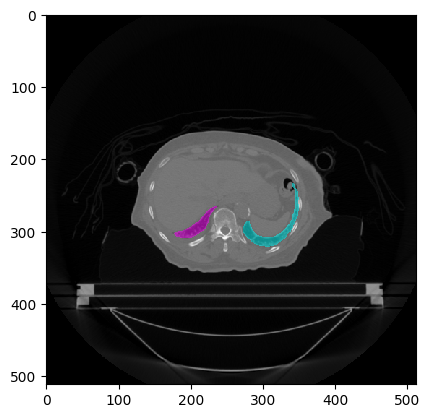

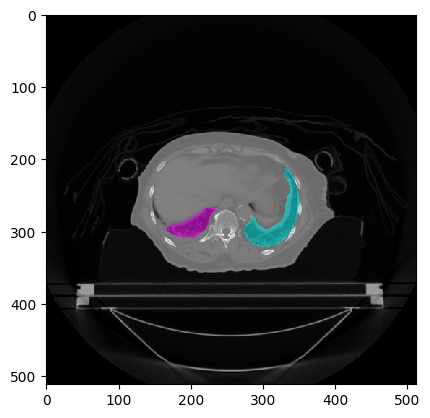

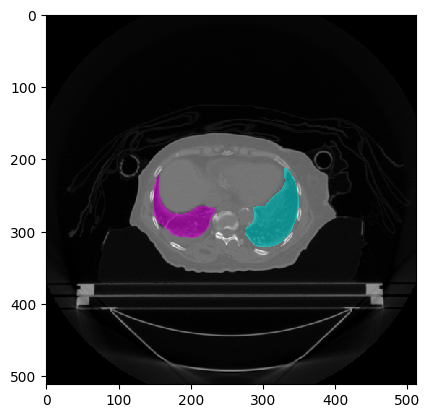

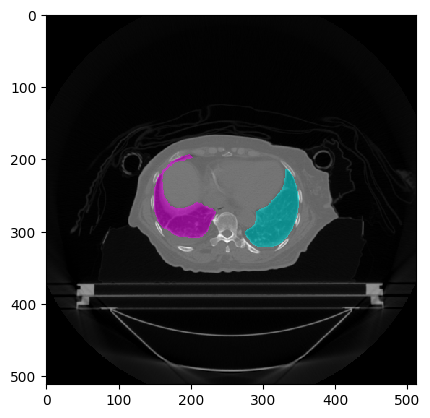

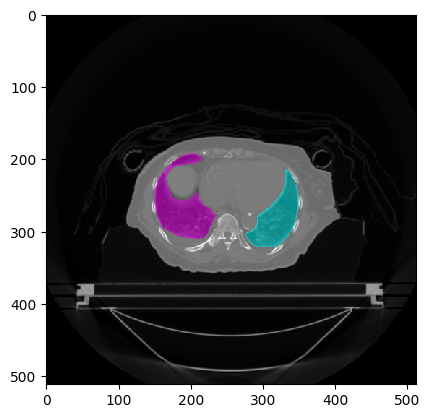

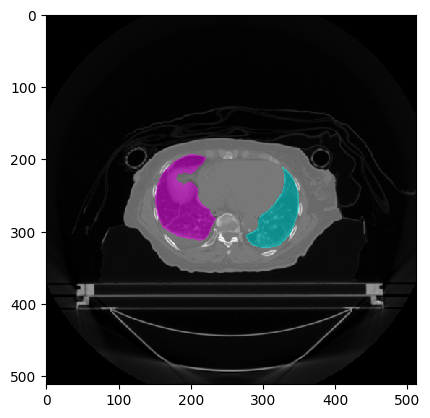

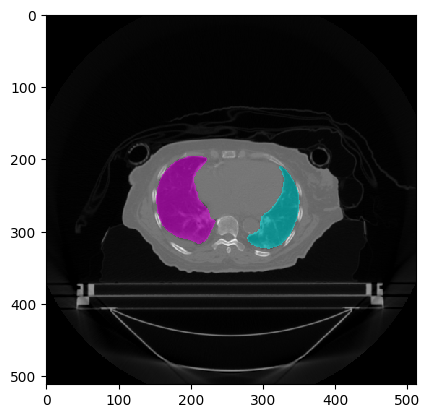

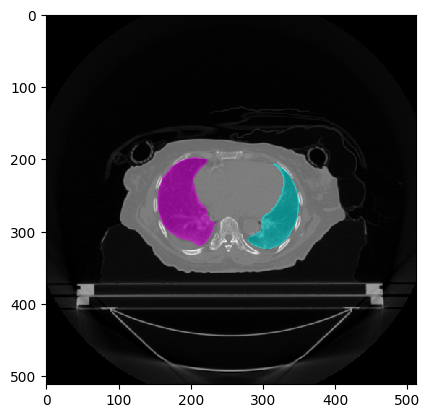

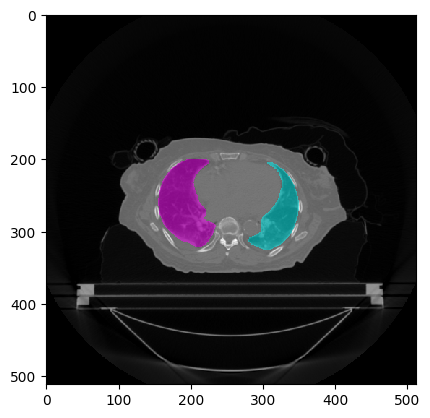

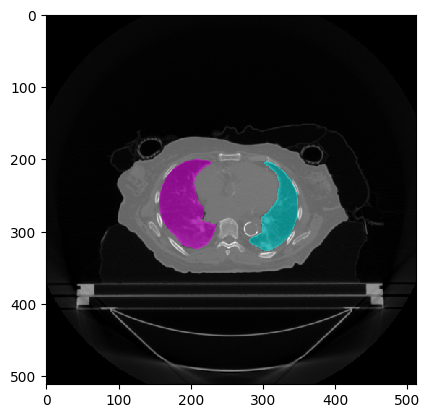

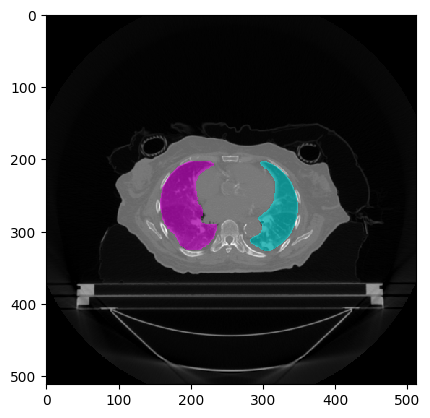

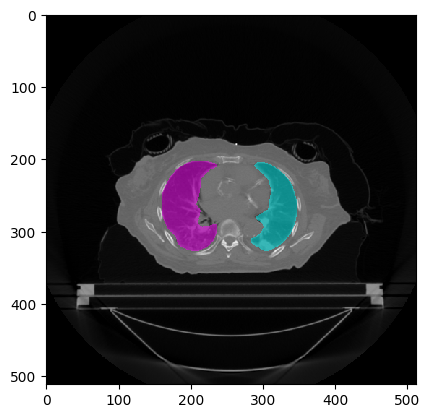

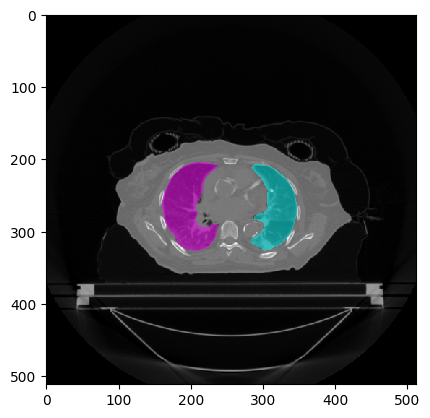

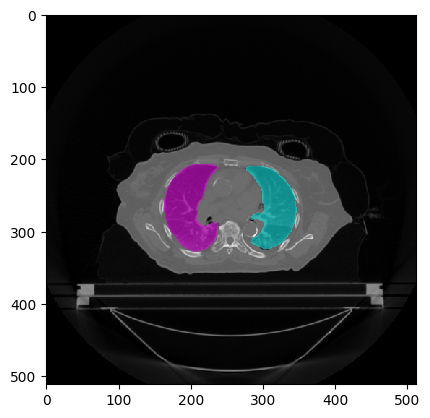

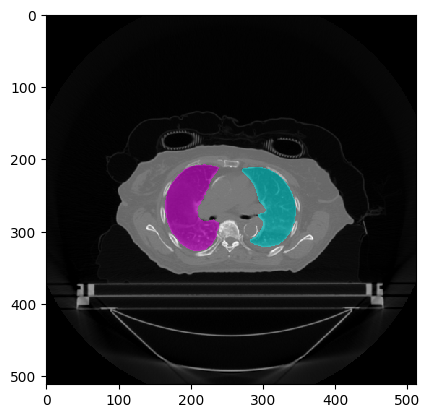

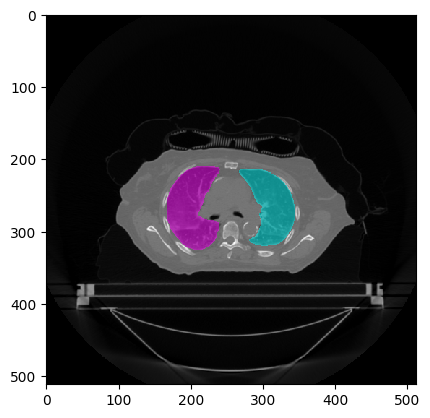

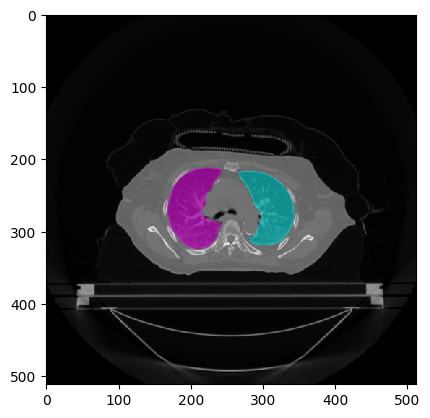

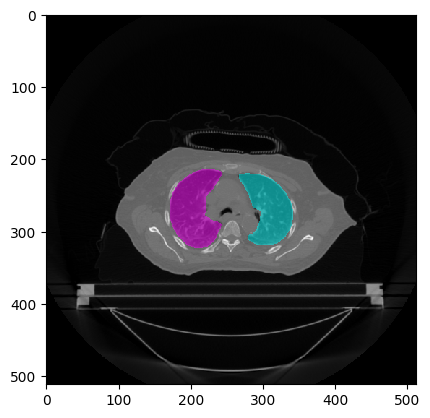

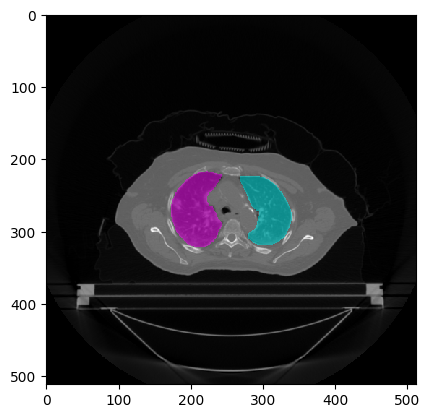

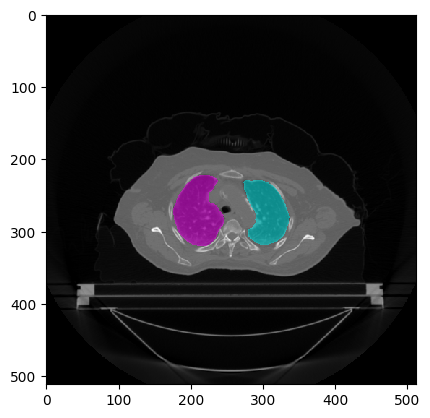

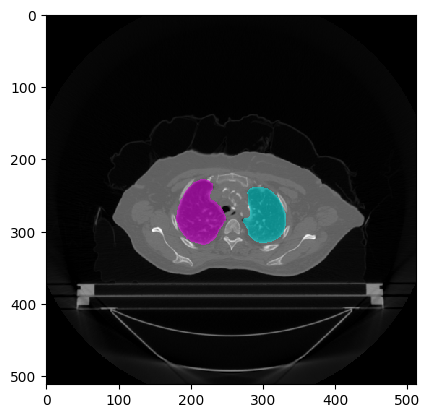

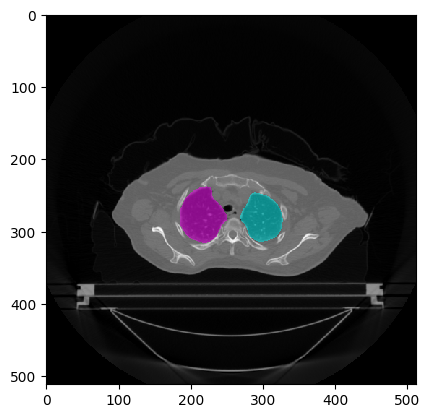

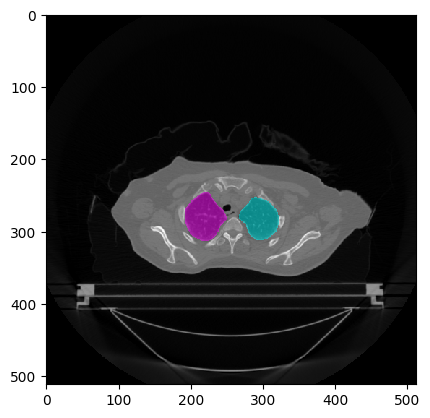

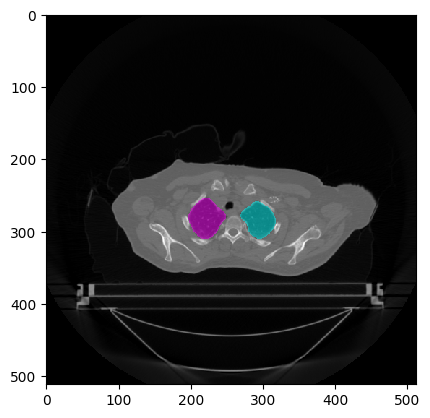

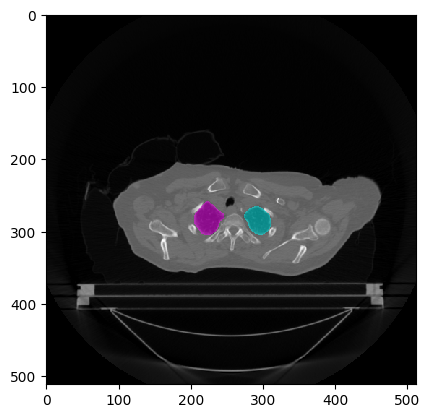

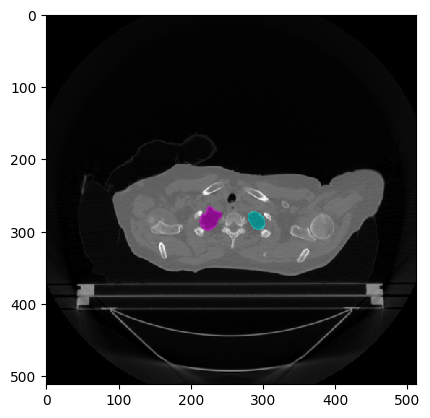

In [20]:
n_slices_skip = 4
display_slices(image, mask, skip = n_slices_skip) # visualize that our segmentations were succesfully convereted

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
"""## initialize DicomRTTool"""
import pandas as pd
from torch.utils.data import Dataset


In [22]:
# Load the labels from the Excel file
labels_df = pd.read_excel('label.xlsx')

class CTMaskDataset(Dataset):
    def __init__(self, image, mask, labels_df):
        self.image = image
        self.mask = mask
        self.labels_df = labels_df

    def __len__(self):
        return len(self.image)

    def __getitem__(self, idx):
        img_slice = self.image[idx]
        mask_slice = self.mask[idx]

        # Normalize the image slice
        img_slice = (img_slice - img_slice.min()) / (img_slice.max() - img_slice.min())
        img_slice = torch.tensor(img_slice[np.newaxis], dtype=torch.float32)

        # Convert mask into binary format (0 for background, 1 for lungs)
        mask_slice = np.where(mask_slice > 0, 1, 0)
        mask_slice = torch.tensor(mask_slice, dtype=torch.long)

        # Get the corresponding label from the Excel file
        anon_id = self.labels_df.iloc[idx]['anon_id']  # Assuming 'anon_id' is the column name for the anonymous id
        label = self.labels_df.loc[self.labels_df['anon_id'] == anon_id, 'pneumonitis'].values[0]  # Assuming 'label' is the column name for the labels

        return img_slice, mask_slice, label

# Create the dataset and data loader
dataset = CTMaskDataset(image, mask, labels_df)
data_loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [23]:

class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 128 * 128, 512)
        self.fc2 = nn.Linear(512, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 128 * 128)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [26]:
# Check if a GPU is available and if not, default to CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Training on {device}")

# Initialize the model, loss function, and optimizer
model = CNNClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Now you can use the model in your training loop
n_epochs = 10
for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, masks, labels) in enumerate(data_loader):
        # Move data and labels to device
        inputs, labels = inputs.to(device), labels.to(device)
        mask = masks.to(device)
        inputs = masks.unsqueeze(1).float()
        optimizer.zero_grad()
        outputs = model(inputs).float()
        labels = labels.long()
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {running_loss / len(data_loader)}")
# Save the model
model_save_path = "./model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Training on cpu
Epoch 1/10, Loss: 7.074790383954424
Epoch 2/10, Loss: 0.34341060007652635
Epoch 3/10, Loss: 0.23280617447440013
Epoch 4/10, Loss: 0.22714389726346315
Epoch 5/10, Loss: 0.21868842438426475
Epoch 6/10, Loss: 0.20884242716656867
Epoch 7/10, Loss: 0.18346377873663292
Epoch 8/10, Loss: 0.1854404990160621
Epoch 9/10, Loss: 0.16687581426095824
Epoch 10/10, Loss: 0.15725484285720212
Model saved to ./model.pth


In [31]:
!pip install sklearn


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [34]:

# Load the test labels from the Excel file
test_labels_df = pd.read_excel('label.xlsx')

# The path to the test DICOM data
Test_Dicom_path = r'/Users/zyzou/Desktop/data/BATCH 2'
Test_Dicom_reader = DicomReaderWriter(description='Test_examples', arg_max=True)
Test_Dicom_reader.walk_through_folders(Test_Dicom_path)

Contour_names = ['lung_l','lung_r']
Test_Dicom_reader.set_contour_names_and_associations(contour_names=Contour_names)

indexes = Test_Dicom_reader.which_indexes_have_all_rois()

pt_indx = indexes[-1]
Test_Dicom_reader.set_index(pt_indx)
Test_Dicom_reader.get_images_and_mask()

test_image = Test_Dicom_reader.ArrayDicom
test_mask = Test_Dicom_reader.mask

# Create the test dataset and data loader
test_dataset = CTMaskDataset(test_image, test_mask, test_labels_df)
test_data_loader = DataLoader(test_dataset, batch_size=4, shuffle=True)

# Track the total accuracy and loss
total_accuracy = 0.0
total_loss = 0.0

# Switch the model to evaluation mode
model.eval()




Loading through DICOM files:   2%|▏         | 4/196 [00:00<00:07, 26.77it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0082/2011-12__Studies/NU.0082_NU.0082_RTPLAN_2011-12-03_120840_SBRT.Lung.Plan.Re-Scan_NU.0082_n1__00000Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0082/2011-12__Studies/NU.0082_NU.0082_CT_2011-12-03_120840_SBRT.Lung.Plan.Re-Scan_NU.0082_n184__00000

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0076/2016-07__Studies/NU.0076_NU.0076_RTst_2016-07-19_093801_sbrt.setup.plan.&.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0082/2011-12__Studies/NU.0082_NU.0082_RTDOSE_2011-12-03_120840_SBRT.Lung.Plan.Re-Scan_NU.0082_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0082/2011-12__Studies/NU.0082_NU.0082_RTst_2011-12-03_120840_SBRT.Lung.Plan.Re-Scan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0076/2016-07__Studies/NU.0076_NU.0076_RTDOSE_2016-07-19_093801_sbrt.setup.plan.&.bellows_NU.0076_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0082/2011-12__Studies/NU.008


Loading through DICOM files:   4%|▎         | 7/196 [00:00<00:13, 14.12it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0078/2016-02__Studies/NU.0078_NU.0078_CT_2016-02-20_133757_sbrt.planning_NU.0078_n125__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0078/2016-02__Studies/NU.0078_NU.0078_RTDOSE_2016-02-20_133757_sbrt.planning_NU.0078_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0078/2016-02__Studies/NU.0078_NU.0078_RTst_2016-02-20_133757_sbrt.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0078/2016-02__Studies/NU.0078_NU.0078_RTPLAN_2016-02-20_133757_sbrt.planning_NU.0078_n1__00000



Loading through DICOM files:   6%|▌         | 11/196 [00:00<00:11, 15.53it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0078/2016-02__Studies/NU.0078_NU.0078_RTPLAN_2016-02-20_133757_sbrt.planning_NU.0078_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055736.988.2648.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0079/2018-04__Studies/NU.0079_NU.0079_CT_2018-04-27_133910_sbrt.lung.planning.and.bellows_._n129__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0079/2018-04__Studies/NU.0079_NU.0079_RTDOSE_2018-04-27_133910_MinIP.sbrt.lung.planning.and.bellows_._n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0079/2018-04__Studies/NU.0079_NU.0079_RTst_2018-04-27_133910_sbrt.lung.planning.and.bellows_AY_n1__00000



Loading through DICOM files:   7%|▋         | 14/196 [00:00<00:12, 14.06it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0079/2018-04__Studies/NU.0079_NU.0079_RTPLAN_2018-04-27_133910_MinIP.sbrt.lung.planning.and.bellows_._n1__00000



Loading through DICOM files:   8%|▊         | 16/196 [00:01<00:19,  9.35it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0079/2018-04__Studies/NU.0079_NU.0079_RTPLAN_2018-04-27_133910_MinIP.sbrt.lung.planning.and.bellows_._n1__00000/2.16.840.1.114362.1.12046989.25391989775.615976789.892.1913.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0084/2017-06__Studies/NU.0084_NU.0084_RTPLAN_2017-06-21_133754_SBRT.Lung.Planning_NU.0084_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0084/2017-06__Studies/NU.0084_NU.0084_RTPLAN_2017-06-21_133754_SBRT.Lung.Planning_NU.0084_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569057273.485.6515.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0084/2017-06__Studies/NU.0084_NU.0084_RTst_2017-06-21_133754_SBRT.Lung.Planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0084/2017-06__Studies/NU.0084_NU.0084_CT_2017-06-21_133754_SBRT.Lung.Planning_NU.0084_n188__00000



Loading through DICOM files:  11%|█         | 22/196 [00:03<00:24,  6.99it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0084/2017-06__Studies/NU.0084_NU.0084_RTDOSE_2017-06-21_133754_SBRT.Lung.Planning_NU.0084_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0070/2012-05__Studies/NU.0070_NU.0070_RTst_2012-05-08_114034_SBRT.LUL.Plan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0070/2012-05__Studies/NU.0070_NU.0070_RTDOSE_2012-05-08_114034_SBRT.LUL.Plan_NU.0070_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0070/2012-05__Studies/NU.0070_NU.0070_RTPLAN_2012-05-08_114034_SBRT.LUL.Plan_NU.0070_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0070/2012-05__Studies/NU.0070_NU.0070_CT_2012-05-08_114034_SBRT.LUL.Plan_NU.0070_n162__00000



Loading through DICOM files:  13%|█▎        | 25/196 [00:03<00:19,  8.75it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0077/2016-10__Studies/NU.0077_NU.0077_CT_2016-10-18_110429_SBRT.Lung_NU.0077_n145__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0070/2012-05__Studies/NU.0070_NU.0070_RTPLAN_2012-05-08_114034_SBRT.LUL.Plan_NU.0070_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584243555.279.2277.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0077/2016-10__Studies/NU.0077_NU.0077_RTDOSE_2016-10-18_110429_SBRT.Lung_NU.0077_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0077/2016-10__Studies/NU.0077_NU.0077_RTst_2016-10-18_110429_SBRT.Lung_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0077/2016-10__Studies/NU.0077_NU.0077_RTPLAN_2016-10-18_110429_SBRT.Lung_NU.0077_n1__00000



Loading through DICOM files:  15%|█▌        | 30/196 [00:03<00:14, 11.22it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0083/2014-01__Studies/NU.0083_NU.0083_CT_2014-01-29_084209_Planning.Scan_NU.0083_n180__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0077/2016-10__Studies/NU.0077_NU.0077_RTPLAN_2016-10-18_110429_SBRT.Lung_NU.0077_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569047963.1085.987.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0083/2014-01__Studies/NU.0083_NU.0083_RTst_2014-01-29_084209_Planning.Scan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0083/2014-01__Studies/NU.0083_NU.0083_RTDOSE_2014-01-29_084209_Planning.Scan_NU.0083_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0083/2014-01__Studies/NU.0083_NU.0083_RTPLAN_2014-01-29_084209_Planning.Scan_NU.0083_n1__00000



Loading through DICOM files:  17%|█▋        | 34/196 [00:04<00:13, 12.27it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0083/2014-01__Studies/NU.0083_NU.0083_RTPLAN_2014-01-29_084209_Planning.Scan_NU.0083_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055920.460.4932.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0119/2012-07__Studies/NU.0119_NU.0119_RTPLAN_2012-07-29_091844_SBRT.planning..bellows_NU.0119_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0119/2012-07__Studies/NU.0119_NU.0119_RTPLAN_2012-07-29_091844_SBRT.planning..bellows_NU.0119_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569053011.150.589.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0119/2012-07__Studies/NU.0119_NU.0119_RTst_2012-07-29_091844_SBRT.planning..bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0119/2012-07__Studies/NU.0119_NU.0119_CT_2012-07-29_091844_SBRT.planning..bellows_NU.0119_n203__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0119/2012-07__Studies/NU.0119_NU.0119_RTDOSE_2012-07-29


Loading through DICOM files:  19%|█▉        | 37/196 [00:04<00:19,  8.18it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0121/2010-11__Studies/NU.0121_NU.0121_RTPLAN_2010-11-01_113640_._NU.0121_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0121/2010-11__Studies/NU.0121_NU.0121_RTPLAN_2010-11-01_113640_._NU.0121_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569049034.514.5266.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0121/2010-11__Studies/NU.0121_NU.0121_CT_2010-11-01_113640_SBRT.Planning.scan_NU.0121_n200__00000



Loading through DICOM files:  20%|█▉        | 39/196 [00:05<00:23,  6.77it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0128/2011-10__Studies/NU.0128_NU.0128_CT_2011-10-25_103304_SBRT.Lung.Planning_NU.0128_n148__00000



Loading through DICOM files:  21%|██▏       | 42/196 [00:05<00:22,  7.00it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0128/2011-10__Studies/NU.0128_NU.0128_RTDOSE_2011-10-25_103304_SBRT.Lung.Bellow.Re-Scan_NU.0128_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0128/2011-10__Studies/NU.0128_NU.0128_RTPLAN_2011-10-25_103304_SBRT.Lung.Bellow.Re-Scan_NU.0128_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0128/2011-10__Studies/NU.0128_NU.0128_RTPLAN_2011-10-25_103304_SBRT.Lung.Bellow.Re-Scan_NU.0128_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055275.578.5843.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0128/2011-10__Studies/NU.0128_NU.0128_RTst_2011-10-25_103304_SBRT.Lung.Planning_AY_n1__00000



Loading through DICOM files:  22%|██▏       | 44/196 [00:06<00:30,  4.90it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0110/2011-09__Studies/NU.0110_NU.0110_RTPLAN_2011-09-23_091338_SBRT.Lung.Iso.Scan_NU.0110_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0110/2011-09__Studies/NU.0110_NU.0110_RTPLAN_2011-09-23_091338_SBRT.Lung.Iso.Scan_NU.0110_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052143.208.6190.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0110/2011-09__Studies/NU.0110_NU.0110_RTDOSE_2011-09-23_091338_SBRT.Lung.Iso.Scan_NU.0110_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0110/2011-09__Studies/NU.0110_NU.0110_RTst_2011-09-23_091338_SBRT.Lung.Planning..Bellows_AY_n1__00000



Loading through DICOM files:  23%|██▎       | 46/196 [00:06<00:25,  5.98it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0110/2011-09__Studies/NU.0110_NU.0110_CT_2011-09-23_091338_SBRT.Lung.Planning..Bellows_NU.0110_n187__00000



Loading through DICOM files:  26%|██▌       | 50/196 [00:07<00:27,  5.40it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0111/2015-03__Studies/NU.0111_NU.0111_CT_2015-03-25_084240_RUL.SBRT.planning.bellows_NU.0111_n150__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0111/2015-03__Studies/NU.0111_NU.0111_RTPLAN_2015-03-25_084240_RUL.SBRT.planning.bellows_NU.0111_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0111/2015-03__Studies/NU.0111_NU.0111_RTst_2015-03-25_084240_RUL.SBRT.planning.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0111/2015-03__Studies/NU.0111_NU.0111_RTDOSE_2015-03-25_084240_RUL.SBRT.planning.bellows_NU.0111_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0116/2017-08__Studies/NU.0116_NU.0116_RTDOSE_2017-08-08_090415_SBRT.planning_NU.0116_n1__00000



Loading through DICOM files:  28%|██▊       | 54/196 [00:07<00:17,  8.09it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0111/2015-03__Studies/NU.0111_NU.0111_RTPLAN_2015-03-25_084240_RUL.SBRT.planning.bellows_NU.0111_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569056274.587.9267.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0116/2017-08__Studies/NU.0116_NU.0116_RTPLAN_2017-08-08_090415_SBRT.planning_NU.0116_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0116/2017-08__Studies/NU.0116_NU.0116_RTst_2017-08-08_090415_SBRT.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0116/2017-08__Studies/NU.0116_NU.0116_CT_2017-08-08_090415_SBRT.planning_NU.0116_n146__00000



Loading through DICOM files:  29%|██▊       | 56/196 [00:07<00:19,  7.34it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0116/2017-08__Studies/NU.0116_NU.0116_RTPLAN_2017-08-08_090415_SBRT.planning_NU.0116_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048569.132.1779.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0120/2010-08__Studies/NU.0120_NU.0120_RTPLAN_2010-08-08_134327_SBRT.Lung.Iso.Placement_NU.0120_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0120/2010-08__Studies/NU.0120_NU.0120_CT_2010-08-08_134327_SBRT.Lung.Planning_NU.0120_n207__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0120/2010-08__Studies/NU.0120_NU.0120_RTPLAN_2010-08-08_134327_SBRT.Lung.Iso.Placement_NU.0120_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051012.1029.9622.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0120/2010-08__Studies/NU.0120_NU.0120_RTst_2010-08-08_134327_SBRT.Lung.Planning_AY_n1__00000



Loading through DICOM files:  31%|███       | 60/196 [00:08<00:21,  6.24it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0120/2010-08__Studies/NU.0120_NU.0120_RTDOSE_2010-08-08_134327_SBRT.Lung.Iso.Placement_NU.0120_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0118/2014-01__Studies/NU.0118_NU.0118_RTDOSE_2014-01-10_094407_SBRT.RLL_NU.0118_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0118/2014-01__Studies/NU.0118_NU.0118_RTst_2014-01-10_094407_SBRT.RLL_AY_n1__00000



Loading through DICOM files:  32%|███▏      | 62/196 [00:09<00:31,  4.20it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0118/2014-01__Studies/NU.0118_NU.0118_RTPLAN_2014-01-10_094407_SBRT.RLL_NU.0118_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0118/2014-01__Studies/NU.0118_NU.0118_RTPLAN_2014-01-10_094407_SBRT.RLL_NU.0118_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055815.516.8334.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0118/2014-01__Studies/NU.0118_NU.0118_CT_2014-01-10_094407_SBRT.RLL_NU.0118_n168__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0127/2018-09__Studies/NU.0127_NU.0127_RTst_2018-09-06_155859_sbrt.lung.planning.scan_AY_n1__00000



Loading through DICOM files:  33%|███▎      | 64/196 [00:10<00:29,  4.49it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0127/2018-09__Studies/NU.0127_NU.0127_RTDOSE_2018-09-06_155859_MinIPsbrt.lung.planning.scan_NU.0127_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0127/2018-09__Studies/NU.0127_NU.0127_RTPLAN_2018-09-06_155859_MinIPsbrt.lung.planning.scan_NU.0127_n1__00000



Loading through DICOM files:  34%|███▍      | 67/196 [00:10<00:23,  5.45it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0127/2018-09__Studies/NU.0127_NU.0127_RTPLAN_2018-09-06_155859_MinIPsbrt.lung.planning.scan_NU.0127_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052615.815.3676.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0127/2018-09__Studies/NU.0127_NU.0127_CT_2018-09-06_155859_sbrt.lung.planning.scan_NU.0127_n160__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0099/2016-06__Studies/NU.0099_NU.0099_RTDOSE_2016-06-07_084603_SBRT.Lung.planning_NU.0099_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0099/2016-06__Studies/NU.0099_NU.0099_CT_2016-06-07_084603_SBRT.Lung.planning_NU.0099_n152__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0099/2016-06__Studies/NU.0099_NU.0099_RTst_2016-06-07_084603_SBRT.Lung.planning_AY_n1__00000



Loading through DICOM files:  37%|███▋      | 72/196 [00:10<00:13,  9.09it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0099/2016-06__Studies/NU.0099_NU.0099_RTPLAN_2016-06-07_084603_SBRT.Lung.planning_NU.0099_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0090/2016-10__Studies/NU.0090_NU.0090_RTPLAN_2016-10-15_083142_RUL.SBRT.plan_NU.0090_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0090/2016-10__Studies/NU.0090_NU.0090_RTDOSE_2016-10-15_083142_RUL.SBRT.plan_NU.0090_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0099/2016-06__Studies/NU.0099_NU.0099_RTPLAN_2016-06-07_084603_SBRT.Lung.planning_NU.0099_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584245178.510.2827.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0090/2016-10__Studies/NU.0090_NU.0090_CT_2016-10-15_083142_RUL.SBRT.plan_NU.0090_n167__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0090/2016-10__Studies/NU.0090_NU.0090_RTst_2016-10-15_083142_RUL.SBRT.plan_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU


Loading through DICOM files:  40%|████      | 79/196 [00:11<00:08, 13.54it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0097/2011-03__Studies/NU.0097_NU.0097_RTPLAN_2011-03-19_114119_SBRT.planning_NU.0097_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0097/2011-03__Studies/NU.0097_NU.0097_RTDOSE_2011-03-19_114119_SBRT.planning_NU.0097_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0097/2011-03__Studies/NU.0097_NU.0097_RTst_2011-03-19_114119_SBRT.planning_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0097/2011-03__Studies/NU.0097_NU.0097_RTPLAN_2011-03-19_114119_SBRT.planning_NU.0097_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055542.682.3868.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0096/2016-01__Studies/NU.0096_NU.0096_RTDOSE_2016-01-10_081812_RUL.Planning_NU.0096_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0096/2016-01__Studies/NU.0096_NU.0096_RTst_2016-01-10_081812_RUL.Planning_AY_n1__00000



Loading through DICOM files:  41%|████▏     | 81/196 [00:11<00:12,  8.95it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0096/2016-01__Studies/NU.0096_NU.0096_RTPLAN_2016-01-10_081812_RUL.Planning_NU.0096_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0096/2016-01__Studies/NU.0096_NU.0096_RTPLAN_2016-01-10_081812_RUL.Planning_NU.0096_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569057518.460.5304.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0096/2016-01__Studies/NU.0096_NU.0096_CT_2016-01-10_081812_RUL.Planning_NU.0096_n170__00000



Loading through DICOM files:  42%|████▏     | 83/196 [00:12<00:25,  4.49it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0098/2017-04__Studies/NU.0098_NU.0098_RTPLAN_2017-04-18_113503_SBRT.Lung.w.Bellows_NU.0098_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0098/2017-04__Studies/NU.0098_NU.0098_RTPLAN_2017-04-18_113503_SBRT.Lung.w.Bellows_NU.0098_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569056662.948.941.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0098/2017-04__Studies/NU.0098_NU.0098_CT_2017-04-18_113503_SBRT.Lung.w.Bellows_NU.0098_n188__00000



Loading through DICOM files:  45%|████▍     | 88/196 [00:13<00:14,  7.47it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0098/2017-04__Studies/NU.0098_NU.0098_RTst_2017-04-18_113503_SBRT.Lung.w.Bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0098/2017-04__Studies/NU.0098_NU.0098_RTDOSE_2017-04-18_113503_SBRT.Lung.w.Bellows_NU.0098_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0072/2013-06__Studies/NU.0072_NU.0072_RTPLAN_2013-06-08_091351_RUL.SBRT.planning_NU.0072_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0072/2013-06__Studies/NU.0072_NU.0072_RTst_2013-06-08_091351_RUL.SBRT.planning_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0072/2013-06__Studies/NU.0072_NU.0072_RTPLAN_2013-06-08_091351_RUL.SBRT.planning_NU.0072_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569053534.550.8050.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0072/2013-06__Studies/NU.0072_NU.0072_CT_2013-06-08_091351_RUL.SBRT.planning_NU.0072_n184__00000



Loading through DICOM files:  46%|████▌     | 90/196 [00:13<00:18,  5.76it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0072/2013-06__Studies/NU.0072_NU.0072_RTDOSE_2013-06-08_091351_RUL.SBRT.planning_NU.0072_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0081/2015-12__Studies/NU.0081_NU.0081_RTDOSE_2015-12-22_133353_LUL.SBRT.Planning_NU.0081_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0081/2015-12__Studies/NU.0081_NU.0081_RTst_2015-12-22_133353_LUL.SBRT.Planning_AY_n1__00000



Loading through DICOM files:  47%|████▋     | 93/196 [00:14<00:14,  6.91it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0081/2015-12__Studies/NU.0081_NU.0081_RTPLAN_2015-12-22_133353_LUL.SBRT.Planning_NU.0081_n1__00000



Loading through DICOM files:  49%|████▉     | 97/196 [00:14<00:12,  7.81it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0081/2015-12__Studies/NU.0081_NU.0081_RTPLAN_2015-12-22_133353_LUL.SBRT.Planning_NU.0081_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569049017.675.4648.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0081/2015-12__Studies/NU.0081_NU.0081_CT_2015-12-22_133353_LUL.SBRT.Planning_NU.0081_n205__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0075/2013-05__Studies/NU.0075_NU.0075_RTPLAN_2013-05-29_092733_MIN-IP.sbrt.lung.planning_NU.0075_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0075/2013-05__Studies/NU.0075_NU.0075_RTPLAN_2013-05-29_092733_MIN-IP.sbrt.lung.planning_NU.0075_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569054183.108.6752.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0075/2013-05__Studies/NU.0075_NU.0075_RTst_2013-05-29_092733_sbrt.lung.planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0075/2013-05__Studies/NU.0075_NU.0075_RTDOSE_2013-05-


Loading through DICOM files:  51%|█████     | 99/196 [00:14<00:11,  8.23it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0075/2013-05__Studies/NU.0075_NU.0075_CT_2013-05-29_092733_sbrt.lung.planning_NU.0075_n232__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0088/2011-11__Studies/NU.0088_NU.0088_RTDOSE_2011-11-07_105034_SBRT.-.Left.lower.lobe.Planning_NU.0088_n1__00000



Loading through DICOM files:  53%|█████▎    | 103/196 [00:15<00:09, 10.15it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0088/2011-11__Studies/NU.0088_NU.0088_RTst_2011-11-07_105034_SBRT.-.Left.lower.lobe.Plan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0088/2011-11__Studies/NU.0088_NU.0088_RTPLAN_2011-11-07_105034_SBRT.-.Left.lower.lobe.Planning_NU.0088_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0088/2011-11__Studies/NU.0088_NU.0088_RTPLAN_2011-11-07_105034_SBRT.-.Left.lower.lobe.Planning_NU.0088_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048704.190.7989.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0088/2011-11__Studies/NU.0088_NU.0088_CT_2011-11-07_105034_SBRT.-.Left.lower.lobe.Plan_NU.0088_n207__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0089/2012-11__Studies/NU.0089_NU.0089_RTDOSE_2012-11-08_092442_SBRT.Lung.planning.bellows_NU.0089_n1__00000



Loading through DICOM files:  54%|█████▎    | 105/196 [00:15<00:08, 11.09it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0089/2012-11__Studies/NU.0089_NU.0089_RTPLAN_2012-11-08_092442_SBRT.Lung.planning.bellows_NU.0089_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0089/2012-11__Studies/NU.0089_NU.0089_RTPLAN_2012-11-08_092442_SBRT.Lung.planning.bellows_NU.0089_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052850.439.3225.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0089/2012-11__Studies/NU.0089_NU.0089_CT_2012-11-08_092442_SBRT.Lung.planning.bellows_NU.0089_n168__00000



Loading through DICOM files:  55%|█████▍    | 107/196 [00:15<00:09,  9.00it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0089/2012-11__Studies/NU.0089_NU.0089_RTst_2012-11-08_092442_SBRT.Lung.planning.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0074/2015-10__Studies/NU.0074_NU.0074_RTst_2015-10-29_084453_SBRT.plan.w..bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0074/2015-10__Studies/NU.0074_NU.0074_RTPLAN_2015-10-29_084453_SBRT.plan.w..bellows_NU.0074_n1__00000



Loading through DICOM files:  57%|█████▋    | 112/196 [00:17<00:14,  5.63it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0074/2015-10__Studies/NU.0074_NU.0074_RTDOSE_2015-10-29_084453_SBRT.plan.w..bellows_NU.0074_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0074/2015-10__Studies/NU.0074_NU.0074_RTPLAN_2015-10-29_084453_SBRT.plan.w..bellows_NU.0074_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584244056.461.2481.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0074/2015-10__Studies/NU.0074_NU.0074_CT_2015-10-29_084453_SBRT.plan.w..bellows_NU.0074_n190__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0080/2011-06__Studies/NU.0080_NU.0080_RTPLAN_2011-06-10_104341_._NU.0080_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0080/2011-06__Studies/NU.0080_NU.0080_RTPLAN_2011-06-10_104341_._NU.0080_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569468495.849.1734.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0080/2011-06__Studies/NU.0080_NU.0080_RTst_2011-06-10_104341_Right.Upper.Lobe_AY_n1__0


Loading through DICOM files:  58%|█████▊    | 114/196 [00:17<00:14,  5.81it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0080/2011-06__Studies/NU.0080_NU.0080_RTDOSE_2011-06-10_104341_._NU.0080_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0080/2011-06__Studies/NU.0080_NU.0080_CT_2011-06-10_104341_Right.Upper.Lobe_NU.0080_n189__00000



Loading through DICOM files:  59%|█████▉    | 116/196 [00:17<00:13,  5.79it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0087/2010-05__Studies/NU.0087_NU.0087_RTDOSE_2010-05-28_105602_SBRT.Lung.iso.Placement_NU.0087_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0087/2010-05__Studies/NU.0087_NU.0087_RTst_2010-05-28_105602_SBRT.Lung.Planning_AY_n1__00000



Loading through DICOM files:  60%|█████▉    | 117/196 [00:18<00:17,  4.61it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0087/2010-05__Studies/NU.0087_NU.0087_RTPLAN_2010-05-28_105602_SBRT.Lung.iso.Placement_NU.0087_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0087/2010-05__Studies/NU.0087_NU.0087_RTPLAN_2010-05-28_105602_SBRT.Lung.iso.Placement_NU.0087_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055261.951.5371.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0087/2010-05__Studies/NU.0087_NU.0087_CT_2010-05-28_105602_SBRT.Lung.Planning_NU.0087_n202__00000



Loading through DICOM files:  62%|██████▏   | 121/196 [00:18<00:11,  6.58it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0073/2015-02__Studies/NU.0073_NU.0073_RTDOSE_2015-02-13_133600_sbrt.lung.planning.bellows_NU.0073_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0073/2015-02__Studies/NU.0073_NU.0073_RTPLAN_2015-02-13_133600_sbrt.lung.planning.bellows_NU.0073_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0073/2015-02__Studies/NU.0073_NU.0073_RTPLAN_2015-02-13_133600_sbrt.lung.planning.bellows_NU.0073_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055185.424.99.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0073/2015-02__Studies/NU.0073_NU.0073_RTst_2015-02-13_133600_sbrt.lung.planning.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0073/2015-02__Studies/NU.0073_NU.0073_CT_2015-02-13_133600_sbrt.lung.planning.bellows_NU.0073_n166__00000



Loading through DICOM files:  63%|██████▎   | 123/196 [00:18<00:11,  6.60it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0101/2012-03__Studies/NU.0101_NU.0101_RTPLAN_2012-03-29_093054_LUL.SBRT.planning.scan_NU.0101_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0101/2012-03__Studies/NU.0101_NU.0101_CT_2012-03-29_093054_LUL.SBRT.planning.scan_NU.0101_n194__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0101/2012-03__Studies/NU.0101_NU.0101_RTPLAN_2012-03-29_093054_LUL.SBRT.planning.scan_NU.0101_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055791.1079.6977.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0101/2012-03__Studies/NU.0101_NU.0101_RTst_2012-03-29_093054_LUL.SBRT.planning.scan_AY_n1__00000



Loading through DICOM files:  66%|██████▌   | 129/196 [00:19<00:06,  9.83it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0101/2012-03__Studies/NU.0101_NU.0101_RTDOSE_2012-03-29_093054_LUL.SBRT.planning.scan_NU.0101_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0106/2018-11__Studies/NU.0106_NU.0106_RTDOSE_2018-11-30_150403_SBRT.Lung.Planning_NU.0106_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0106/2018-11__Studies/NU.0106_NU.0106_RTst_2018-11-30_150403_SBRT.Lung.Planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0106/2018-11__Studies/NU.0106_NU.0106_CT_2018-11-30_150403_SBRT.Lung.Planning_NU.0106_n158__00000



Loading through DICOM files:  67%|██████▋   | 131/196 [00:19<00:10,  6.32it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0106/2018-11__Studies/NU.0106_NU.0106_RTPLAN_2018-11-30_150403_SBRT.Lung.Planning_NU.0106_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0106/2018-11__Studies/NU.0106_NU.0106_RTPLAN_2018-11-30_150403_SBRT.Lung.Planning_NU.0106_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051664.509.1078.dcm


Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0131/2012-05__Studies/NU.0131_NU.0131_RTst_2012-05-17_084534_lung.bellows..planning.scan_AY_n1__00000



Loading through DICOM files:  69%|██████▉   | 135/196 [00:20<00:09,  6.24it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0131/2012-05__Studies/NU.0131_NU.0131_CT_2012-05-17_084534_lung.bellows..planning.scan_NU.0131_n197__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0131/2012-05__Studies/NU.0131_NU.0131_RTDOSE_2012-05-17_084534_._NU.0131_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0131/2012-05__Studies/NU.0131_NU.0131_RTPLAN_2012-05-17_084534_._NU.0131_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0131/2012-05__Studies/NU.0131_NU.0131_RTPLAN_2012-05-17_084534_._NU.0131_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569048439.924.8312.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0107/2012-08__Studies/NU.0107_NU.0107_CT_2012-08-28_091754_sbrt.planning.bellows_NU.0107_n212__00000



Loading through DICOM files:  71%|███████   | 139/196 [00:21<00:07,  7.99it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0107/2012-08__Studies/NU.0107_NU.0107_RTDOSE_2012-08-28_091754_sbrt.planning.bellows_NU.0107_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0107/2012-08__Studies/NU.0107_NU.0107_RTPLAN_2012-08-28_091754_sbrt.planning.bellows_NU.0107_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0107/2012-08__Studies/NU.0107_NU.0107_RTPLAN_2012-08-28_091754_sbrt.planning.bellows_NU.0107_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569563285.897.1288.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0107/2012-08__Studies/NU.0107_NU.0107_RTst_2012-08-28_091754_sbrt.planning.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0100/2016-09__Studies/NU.0100_NU.0100_RTst_2016-09-27_132018_SBRT.lung.plan.&.bellows_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0100/2016-09__Studies/NU.0100_NU.0100_CT_2016-09-27_132018_SBRT.lung.plan.&.bellows_NU.0100_n161__00000



Loading through DICOM files:  72%|███████▏  | 141/196 [00:21<00:07,  7.75it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0100/2016-09__Studies/NU.0100_NU.0100_RTDOSE_2016-09-27_132018_SBRT.lung.plan.&.bellows_NU.0100_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0100/2016-09__Studies/NU.0100_NU.0100_RTPLAN_2016-09-27_132018_SBRT.lung.plan.&.bellows_NU.0100_n1__00000



Loading through DICOM files:  73%|███████▎  | 143/196 [00:21<00:06,  7.88it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0100/2016-09__Studies/NU.0100_NU.0100_RTPLAN_2016-09-27_132018_SBRT.lung.plan.&.bellows_NU.0100_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569057527.279.6110.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0122/2009-10__Studies/NU.0122_NU.0122_RTst_2009-10-23_092337_SBRT.Lung_AY_n1__00000



Loading through DICOM files:  74%|███████▍  | 145/196 [00:22<00:07,  6.62it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0122/2009-10__Studies/NU.0122_NU.0122_RTPLAN_2009-10-23_092337_._NU.0122_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0122/2009-10__Studies/NU.0122_NU.0122_RTPLAN_2009-10-23_092337_._NU.0122_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569055535.156.3714.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0122/2009-10__Studies/NU.0122_NU.0122_RTDOSE_2009-10-23_092337_._NU.0122_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0122/2009-10__Studies/NU.0122_NU.0122_CT_2009-10-23_092337_SBRT.Lung_NU.0122_n206__00000



Loading through DICOM files:  75%|███████▌  | 147/196 [00:22<00:07,  6.18it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0125/2011-02__Studies/NU.0125_NU.0125_RTst_2011-02-03_105148_SBRT.Left.Lung.Plan.Scan_AY_n1__00000



Loading through DICOM files:  76%|███████▌  | 149/196 [00:23<00:10,  4.30it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0125/2011-02__Studies/NU.0125_NU.0125_RTPLAN_2011-02-03_105148_._NU.0125_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0125/2011-02__Studies/NU.0125_NU.0125_RTPLAN_2011-02-03_105148_._NU.0125_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569467479.759.5200.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0125/2011-02__Studies/NU.0125_NU.0125_CT_2011-02-03_105148_SBRT.Left.Lung.Plan.Scan_NU.0125_n162__00000



Loading through DICOM files:  79%|███████▊  | 154/196 [00:23<00:05,  8.38it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0125/2011-02__Studies/NU.0125_NU.0125_RTDOSE_2011-02-03_105148_._NU.0125_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0113/2012-06__Studies/NU.0113_NU.0113_CT_2012-06-02_102820_SBRT.Planning.Scan_NU.0113_n206__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0113/2012-06__Studies/NU.0113_NU.0113_RTPLAN_2012-06-02_102820_SBRT.Planning.Scan_NU.0113_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0113/2012-06__Studies/NU.0113_NU.0113_RTst_2012-06-02_102820_SBRT.Planning.Scan_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0113/2012-06__Studies/NU.0113_NU.0113_RTPLAN_2012-06-02_102820_SBRT.Planning.Scan_NU.0113_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051076.238.2597.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0113/2012-06__Studies/NU.0113_NU.0113_RTDOSE_2012-06-02_102820_SBRT.Planning.Scan_NU.0113_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0114


Loading through DICOM files:  81%|████████  | 159/196 [00:23<00:03, 10.76it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0114/2019-02__Studies/NU.0114_NU.0114_RTPLAN_2019-02-16_144510_MinIP.SBRT.RUL.Planning_NU.0114_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0114/2019-02__Studies/NU.0114_NU.0114_CT_2019-02-16_144510_SBRT.RUL.Planning_NU.0114_n140__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0114/2019-02__Studies/NU.0114_NU.0114_RTPLAN_2019-02-16_144510_MinIP.SBRT.RUL.Planning_NU.0114_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569049510.830.8181.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0115/2010-06__Studies/NU.0115_NU.0115_RTPLAN_2010-06-01_110608_SBRT.Lung.Planning_NU.0115_n1__00000



Loading through DICOM files:  82%|████████▏ | 161/196 [00:24<00:02, 12.07it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0115/2010-06__Studies/NU.0115_NU.0115_RTPLAN_2010-06-01_110608_SBRT.Lung.Planning_NU.0115_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051119.648.6026.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0115/2010-06__Studies/NU.0115_NU.0115_RTst_2010-06-01_110608_SBRT.Lung.Planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0115/2010-06__Studies/NU.0115_NU.0115_RTDOSE_2010-06-01_110608_SBRT.Lung.Planning_NU.0115_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0115/2010-06__Studies/NU.0115_NU.0115_CT_2010-06-01_110608_SBRT.Lung.Planning_NU.0115_n214__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0112/2018-10__Studies/NU.0112_NU.0112_CT_2018-10-02_095902_SBRT.Lung.Plan_NU.0112_n175__00000



Loading through DICOM files:  84%|████████▎ | 164/196 [00:24<00:03,  9.86it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0112/2018-10__Studies/NU.0112_NU.0112_RTPLAN_2018-10-02_095902_SBRT.Lung.Plan_NU.0112_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0112/2018-10__Studies/NU.0112_NU.0112_RTDOSE_2018-10-02_095902_SBRT.Lung.Plan_NU.0112_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0112/2018-10__Studies/NU.0112_NU.0112_RTst_2018-10-02_095902_SBRT.Lung.Plan_AY_n1__00000



Loading through DICOM files:  85%|████████▌ | 167/196 [00:24<00:02, 10.68it/s]


Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0112/2018-10__Studies/NU.0112_NU.0112_RTPLAN_2018-10-02_095902_SBRT.Lung.Plan_NU.0112_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569056835.444.5479.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0124/2011-06__Studies/NU.0124_NU.0124_RTDOSE_2011-06-05_143030_._NU.0124_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0124/2011-06__Studies/NU.0124_NU.0124_CT_2011-06-05_143030_bellows.scan_NU.0124_n155__00000


Loading through DICOM files:  87%|████████▋ | 171/196 [00:25<00:02, 11.45it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0124/2011-06__Studies/NU.0124_NU.0124_RTPLAN_2011-06-05_143030_._NU.0124_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0124/2011-06__Studies/NU.0124_NU.0124_RTPLAN_2011-06-05_143030_._NU.0124_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569049605.577.4134.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0124/2011-06__Studies/NU.0124_NU.0124_RTst_2011-06-05_143030_bellows.scan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0069/2016-05__Studies/NU.0069_NU.0069_RTPLAN_2016-05-16_084017_RUL.SBRT.Plan_NU.0069_n1__00000



Loading through DICOM files:  88%|████████▊ | 173/196 [00:25<00:02, 10.49it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0069/2016-05__Studies/NU.0069_NU.0069_RTPLAN_2016-05-16_084017_RUL.SBRT.Plan_NU.0069_n1__00000/2.16.840.1.114362.1.11940992.24327927514.584243516.541.2105.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0069/2016-05__Studies/NU.0069_NU.0069_RTDOSE_2016-05-16_084017_RUL.SBRT.Plan_NU.0069_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0069/2016-05__Studies/NU.0069_NU.0069_RTst_2016-05-16_084017_RUL.SBRT.Plan_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0069/2016-05__Studies/NU.0069_NU.0069_CT_2016-05-16_084017_RUL.SBRT.Plan_NU.0069_n137__00000



Loading through DICOM files:  90%|█████████ | 177/196 [00:26<00:04,  4.55it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0094/2013-03__Studies/NU.0094_NU.0094_CT_2013-03-16_085903_SBRT.Scout_NU.0094_n217__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0094/2013-03__Studies/NU.0094_NU.0094_RTDOSE_2013-03-16_085903_SBRT.Scout_NU.0094_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0094/2013-03__Studies/NU.0094_NU.0094_RTst_2013-03-16_085903_SBRT.Scout_AY_n1__00000



Loading through DICOM files:  92%|█████████▏| 180/196 [00:26<00:03,  4.94it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0094/2013-03__Studies/NU.0094_NU.0094_RTPLAN_2013-03-16_085903_SBRT.Scout_NU.0094_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0093/2010-09__Studies/NU.0093_NU.0093_RTPLAN_2010-09-08_110828_SBRT.Lung.Planning_NU.0093_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0093/2010-09__Studies/NU.0093_NU.0093_RTPLAN_2010-09-08_110828_SBRT.Lung.Planning_NU.0093_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569051095.527.3221.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0093/2010-09__Studies/NU.0093_NU.0093_RTst_2010-09-08_110828_SBRT.Lung.Planning_AY_n1__00000
Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0094/2013-03__Studies/NU.0094_NU.0094_RTPLAN_2013-03-16_085903_SBRT.Scout_NU.0094_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052648.127.5200.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0093/2010-09__Studies/NU.0093_NU.0093_CT_2010-09-08_110828_SBRT.Lung.Planning_N


Loading through DICOM files:  93%|█████████▎| 182/196 [00:27<00:02,  5.12it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0093/2010-09__Studies/NU.0093_NU.0093_RTDOSE_2010-09-08_110828_SBRT.Lung.Planning_NU.0093_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0092/2016-12__Studies/NU.0092_NU.0092_RTPLAN_2016-12-05_133854_SBRT.lung.planning_NU.0092_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0092/2016-12__Studies/NU.0092_NU.0092_RTst_2016-12-05_133854_SBRT.lung.planning_AY_n1__00000



Loading through DICOM files:  94%|█████████▍| 185/196 [00:27<00:01,  6.86it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0092/2016-12__Studies/NU.0092_NU.0092_RTPLAN_2016-12-05_133854_SBRT.lung.planning_NU.0092_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569052445.673.7788.dcm
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0092/2016-12__Studies/NU.0092_NU.0092_RTDOSE_2016-12-05_133854_SBRT.lung.planning_NU.0092_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0092/2016-12__Studies/NU.0092_NU.0092_CT_2016-12-05_133854_SBRT.lung.planning_NU.0092_n129__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0095/2010-02__Studies/NU.0095_NU.0095_CT_2010-02-07_102509_SBRT.Planning_NU.0095_n201__00000



Loading through DICOM files:  97%|█████████▋| 190/196 [00:27<00:00,  8.49it/s]

Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0095/2010-02__Studies/NU.0095_NU.0095_RTDOSE_2010-02-07_102509_._NU.0095_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0095/2010-02__Studies/NU.0095_NU.0095_RTst_2010-02-07_102509_SBRT.Planning_AY_n1__00000
Loading from /Users/zyzou/Desktop/data/BATCH 2/NU_0095/2010-02__Studies/NU.0095_NU.0095_RTPLAN_2010-02-07_102509_._NU.0095_n1__00000



Loading through DICOM files:  98%|█████████▊| 192/196 [00:28<00:00,  9.66it/s]

Had an error loading /Users/zyzou/Desktop/data/BATCH 2/NU_0095/2010-02__Studies/NU.0095_NU.0095_RTPLAN_2010-02-07_102509_._NU.0095_n1__00000/2.16.840.1.114362.1.11940992.22933840372.569050544.323.5992.dcm



Loading through DICOM files: 100%|██████████| 196/196 [00:29<00:00,  6.68it/s]


Compiling dictionaries together...
Index 0, description NU_0077  at /Users/zyzou/Desktop/data/BATCH 2/NU_0077/2016-10__Studies/NU.0077_NU.0077_CT_2016-10-18_110429_SBRT.Lung_NU.0077_n145__00000
Index 1, description NU_0131  at /Users/zyzou/Desktop/data/BATCH 2/NU_0131/2012-05__Studies/NU.0131_NU.0131_CT_2012-05-17_084534_lung.bellows..planning.scan_NU.0131_n197__00000
Index 2, description NU_0116  at /Users/zyzou/Desktop/data/BATCH 2/NU_0116/2017-08__Studies/NU.0116_NU.0116_CT_2017-08-08_090415_SBRT.planning_NU.0116_n146__00000
Index 3, description NU_0088  at /Users/zyzou/Desktop/data/BATCH 2/NU_0088/2011-11__Studies/NU.0088_NU.0088_CT_2011-11-07_105034_SBRT.-.Left.lower.lobe.Plan_NU.0088_n207__00000
Index 4, description NU_0081  at /Users/zyzou/Desktop/data/BATCH 2/NU_0081/2015-12__Studies/NU.0081_NU.0081_CT_2015-12-22_133353_LUL.SBRT.Planning_NU.0081_n205__00000
Index 5, description NU_0121  at /Users/zyzou/Desktop/data/BATCH 2/NU_0121/2010-11__Studies/NU.0121_NU.0121_CT_2010-11-01_

CNNClassifier(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1048576, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=2, bias=True)
  (relu): ReLU()
)

In [39]:
# Iterate over the test data
for i, (inputs, masks, labels) in enumerate(test_data_loader):
    # Move data and labels to device
    inputs, labels = inputs.to(device), labels.to(device).long()
    masks = masks.to(device)
    inputs = masks.unsqueeze(1).float()

    # Compute model outputs
    outputs = model(inputs)

    # Compute the loss
    loss = criterion(outputs, labels)

    # Convert model outputs to predicted classes
    _, predicted = outputs.max(1)

        # Print predicted labels and true labels
    # print(f"Batch {i+1} predictions: {predicted.tolist()}")
    # print(f"Batch {i+1} true labels: {labels.tolist()}")

    # Compute the accuracy and loss for this batch
    correct = (predicted == labels).sum().item()
    accuracy = correct / len(labels)

    # Add to the total accuracy and loss
    # total_accuracy += accuracy
    # total_loss += loss.item()

# Compute the average accuracy and loss
average_accuracy = total_accuracy / len(test_data_loader)
average_loss = total_loss / len(test_data_loader)

print(f'Test Accuracy: {average_accuracy * 100:.2f}%')
print(f'Test Loss: {average_loss:.2f}')


Test Accuracy: 372.73%
Test Loss: 2.21
